# Train YOLO with annotated data

In [1]:
!nvidia-smi

Sat Oct 26 19:19:45 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.107.02             Driver Version: 550.107.02     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090        Off |   00000000:21:00.0 Off |                  N/A |
|  0%   43C    P8             30W /  370W |      26MiB /  24576MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
from ultralytics import YOLO
import os
from IPython.display import Image, display
from IPython import display
display.clear_output()
!yolo mode=checks


Traceback (most recent call last):
  File "/home/hara/personal/tk_2420/.venv/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/home/hara/personal/tk_2420/.venv/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 765, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/home/hara/personal/tk_2420/.venv/lib/python3.10/site-packages/ultralytics/utils/checks.py'>'. Valid modes are {'val', 'predict', 'track', 'export', 'benchmark', 'train'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'obb', 'detect', 'pose', 'classify', 'segment'}
                MODE (required) is one of {'val', 'predict', 'track', 'export', 'benchmark', 'train'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgs

In [3]:
model = YOLO("yolo11n.pt")
results = model.train(data="../hack.v2i.yolov11/data.yaml", epochs=100, imgsz=640)

Ultralytics 8.3.23 🚀 Python-3.10.15 torch-2.5.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24253MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=../hack.v2i.yolov11/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

100%|██████████| 755k/755k [00:00<00:00, 66.0MB/s]
E0000 00:00:1729937992.861715  553265 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1729937992.866693  553265 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /home/hara/personal/tk_2420/hack.v2i.yolov11/train/labels... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<00:00, 1647.28it/s]

train: New cache created: /home/hara/personal/tk_2420/hack.v2i.yolov11/train/labels.cache



val: Scanning /home/hara/personal/tk_2420/hack.v2i.yolov11/valid/labels... 2 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:00<00:00, 1776.87it/s]

val: New cache created: /home/hara/personal/tk_2420/hack.v2i.yolov11/valid/labels.cache


Plotting labels to /home/hara/personal/tk_2420/runs/detect/train15/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/hara/personal/tk_2420/runs/detect/train15
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.807G      1.505      3.432      1.526         12        640: 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all          2          2    0.00444          1      0.373      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.763G      1.619       3.44      1.695         13        640: 100%|██████████| 1/1 [00:00<00:00, 13.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.45it/s]

                   all          2          2    0.00467          1      0.332      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.763G      1.202      3.321      1.454          9        640: 100%|██████████| 1/1 [00:00<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.88it/s]

                   all          2          2    0.00511          1      0.332      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.763G      1.334      3.438      1.664         11        640: 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.51it/s]

                   all          2          2    0.00563          1      0.332      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.761G      1.633      3.751       1.89          8        640: 100%|██████████| 1/1 [00:00<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 36.07it/s]

                   all          2          2    0.00643          1      0.663      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      0.78G      1.534      3.189      1.705         15        640: 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 40.36it/s]

                   all          2          2    0.00717          1      0.332      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.782G      1.212      3.353      1.368         14        640: 100%|██████████| 1/1 [00:00<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 40.66it/s]

                   all          2          2    0.00869          1      0.663      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.782G      1.173      3.357      1.436         10        640: 100%|██████████| 1/1 [00:00<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.81it/s]

                   all          2          2     0.0108          1      0.746      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.782G     0.7771      3.261      1.125         13        640: 100%|██████████| 1/1 [00:00<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.02it/s]

                   all          2          2     0.0137          1      0.746      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      0.78G     0.9108      3.255      1.373         10        640: 100%|██████████| 1/1 [00:00<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 40.14it/s]

                   all          2          2      0.015          1      0.746      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.782G      0.938      3.234      1.362         15        640: 100%|██████████| 1/1 [00:00<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.69it/s]

                   all          2          2     0.0187          1      0.746      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.782G     0.8512      3.145      1.308         14        640: 100%|██████████| 1/1 [00:00<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 40.42it/s]

                   all          2          2     0.0264          1      0.746      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      0.78G     0.5765      3.358      1.165          7        640: 100%|██████████| 1/1 [00:00<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 40.73it/s]

                   all          2          2     0.0308          1      0.663      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      0.78G      1.448      3.724       1.77          8        640: 100%|██████████| 1/1 [00:00<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.66it/s]

                   all          2          2      0.043          1      0.746      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.782G      0.744      3.078      1.182          9        640: 100%|██████████| 1/1 [00:00<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 40.81it/s]

                   all          2          2     0.0513          1      0.995      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      0.78G      0.962      3.052      1.222         14        640: 100%|██████████| 1/1 [00:00<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 40.84it/s]

                   all          2          2     0.0638          1      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      0.78G      1.222      3.309      1.583          7        640: 100%|██████████| 1/1 [00:00<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.90it/s]

                   all          2          2      0.043          1      0.746      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.782G     0.7815      3.079      1.138          9        640: 100%|██████████| 1/1 [00:00<00:00, 13.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.91it/s]

                   all          2          2      0.043          1      0.746      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.803G      1.045       2.99      1.152         12        640: 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.78it/s]

                   all          2          2     0.0327          1      0.746      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.782G     0.9464      2.811       1.14         12        640: 100%|██████████| 1/1 [00:00<00:00, 13.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.30it/s]

                   all          2          2     0.0327          1      0.746      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.801G      1.291      3.218      1.474          9        640: 100%|██████████| 1/1 [00:00<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.89it/s]

                   all          2          2     0.0242          1      0.746      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      0.78G     0.8385      2.768      1.136         16        640: 100%|██████████| 1/1 [00:00<00:00, 13.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.16it/s]

                   all          2          2     0.0242          1      0.746      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.801G     0.9638      2.945      1.429          8        640: 100%|██████████| 1/1 [00:00<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.56it/s]

                   all          2          2     0.0224          1      0.622      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      0.78G     0.9522      3.061      1.332          9        640: 100%|██████████| 1/1 [00:00<00:00, 13.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.38it/s]

                   all          2          2     0.0224          1      0.622      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.803G     0.7815      3.037      1.254         10        640: 100%|██████████| 1/1 [00:00<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.96it/s]

                   all          2          2     0.0189          1      0.663      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.782G     0.7805      2.893      1.143         13        640: 100%|██████████| 1/1 [00:00<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.97it/s]

                   all          2          2     0.0189          1      0.663      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.803G      1.055       2.77      1.164         11        640: 100%|██████████| 1/1 [00:00<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.31it/s]

                   all          2          2    0.00959          1      0.746      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      0.78G     0.7014      2.784      1.103         10        640: 100%|██████████| 1/1 [00:00<00:00, 13.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.13it/s]

                   all          2          2    0.00959          1      0.746      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.803G     0.8333      2.535      1.104         13        640: 100%|██████████| 1/1 [00:00<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.47it/s]

                   all          2          2    0.00805          1      0.497      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      0.78G     0.6413      2.339      1.006         14        640: 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.53it/s]

                   all          2          2    0.00805          1      0.497      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.803G     0.7943       2.84      1.122         10        640: 100%|██████████| 1/1 [00:00<00:00, 10.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.97it/s]

                   all          2          2    0.00651          1      0.497      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.782G     0.6554      2.415      1.113          9        640: 100%|██████████| 1/1 [00:00<00:00, 13.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 43.20it/s]

                   all          2          2    0.00651          1      0.497      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.803G      0.868      2.589      1.122         11        640: 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.55it/s]

                   all          2          2    0.00631          1      0.746      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.782G      0.664      2.507      1.031         14        640: 100%|██████████| 1/1 [00:00<00:00, 13.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.85it/s]

                   all          2          2    0.00631          1      0.746      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.803G     0.6174      2.263      1.134         12        640: 100%|██████████| 1/1 [00:00<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.96it/s]

                   all          2          2    0.00608          1      0.746      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.782G      0.728      2.579      1.261         11        640: 100%|██████████| 1/1 [00:00<00:00, 13.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.70it/s]

                   all          2          2    0.00608          1      0.746      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.803G     0.8019      2.337     0.9834         13        640: 100%|██████████| 1/1 [00:00<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.97it/s]

                   all          2          2    0.00573          1      0.746      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      0.78G     0.5662      2.734      1.114          6        640: 100%|██████████| 1/1 [00:00<00:00, 13.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 43.04it/s]

                   all          2          2    0.00573          1      0.746      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.803G     0.8136      2.179       1.11          9        640: 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 43.24it/s]

                   all          2          2    0.00552          1      0.415      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      0.78G      1.149      2.106      1.472         11        640: 100%|██████████| 1/1 [00:00<00:00, 13.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.62it/s]

                   all          2          2    0.00552          1      0.415      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.803G     0.7784      2.121      1.175         12        640: 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 40.97it/s]

                   all          2          2    0.00565          1      0.415      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.782G     0.7461       2.38      1.217          9        640: 100%|██████████| 1/1 [00:00<00:00, 13.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 40.29it/s]

                   all          2          2    0.00565          1      0.415      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.801G     0.6235      2.457      1.129          7        640: 100%|██████████| 1/1 [00:00<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.97it/s]

                   all          2          2    0.00578          1      0.373      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      0.78G     0.9098      2.392      1.202          8        640: 100%|██████████| 1/1 [00:00<00:00, 13.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.92it/s]

                   all          2          2    0.00578          1      0.373      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.803G     0.9135      2.332      1.258         10        640: 100%|██████████| 1/1 [00:00<00:00, 10.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.27it/s]

                   all          2          2    0.00596          1      0.622      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.782G      1.158      2.487       1.29         14        640: 100%|██████████| 1/1 [00:00<00:00, 13.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.51it/s]

                   all          2          2    0.00596          1      0.622      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.801G     0.6706      2.507      1.161          7        640: 100%|██████████| 1/1 [00:00<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.11it/s]

                   all          2          2    0.00585          1      0.622      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.782G      1.252      2.281      1.434         14        640: 100%|██████████| 1/1 [00:00<00:00, 13.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.31it/s]

                   all          2          2    0.00585          1      0.622      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.803G      1.006      2.194      1.312         15        640: 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 43.24it/s]

                   all          2          2    0.00549          1      0.249      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.782G     0.8734       2.33      1.181         10        640: 100%|██████████| 1/1 [00:00<00:00, 13.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.55it/s]

                   all          2          2    0.00549          1      0.249      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.803G     0.8217      1.866      1.047         11        640: 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.72it/s]

                   all          2          2    0.00525          1      0.415      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      0.78G     0.5102      1.767     0.9702         14        640: 100%|██████████| 1/1 [00:00<00:00, 13.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 43.42it/s]

                   all          2          2    0.00525          1      0.415      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.803G     0.7313      2.177      1.197         10        640: 100%|██████████| 1/1 [00:00<00:00, 13.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 43.03it/s]

                   all          2          2    0.00525          1      0.415      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.801G      0.749      2.206      1.246          7        640: 100%|██████████| 1/1 [00:00<00:00, 10.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 43.47it/s]

                   all          2          2    0.00522          1      0.553      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.782G     0.8202      1.987      1.186         14        640: 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 43.47it/s]

                   all          2          2    0.00522          1      0.553      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.803G     0.9597      2.263      1.144         12        640: 100%|██████████| 1/1 [00:00<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 39.55it/s]

                   all          2          2    0.00522          1      0.553      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.801G     0.9306      2.161      1.476         12        640: 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.11it/s]

                   all          2          2    0.00533          1       0.58      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      0.78G     0.6822      2.801      1.276          5        640: 100%|██████████| 1/1 [00:00<00:00, 13.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.69it/s]

                   all          2          2    0.00533          1       0.58      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.803G     0.5857      1.627      0.953         14        640: 100%|██████████| 1/1 [00:00<00:00, 13.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 43.81it/s]

                   all          2          2    0.00533          1       0.58      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.803G     0.7114      1.818      1.091          9        640: 100%|██████████| 1/1 [00:00<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 41.49it/s]

                   all          2          2    0.00518          1      0.597      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.782G     0.7956      1.724      1.093         16        640: 100%|██████████| 1/1 [00:00<00:00, 13.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.89it/s]

                   all          2          2    0.00518          1      0.597      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.803G     0.5938      1.781       1.07         12        640: 100%|██████████| 1/1 [00:00<00:00, 13.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 43.75it/s]

                   all          2          2    0.00518          1      0.597      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.803G      1.019      2.224      1.295         11        640: 100%|██████████| 1/1 [00:00<00:00, 10.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 42.79it/s]

                   all          2          2    0.00531          1      0.746      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.782G     0.7139      2.038      1.112         12        640: 100%|██████████| 1/1 [00:00<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 43.83it/s]

                   all          2          2    0.00531          1      0.746      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.803G     0.8206      2.186       1.22          9        640: 100%|██████████| 1/1 [00:00<00:00, 13.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 44.76it/s]

                   all          2          2    0.00531          1      0.746      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.803G     0.7266      1.559      1.049         17        640: 100%|██████████| 1/1 [00:00<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 45.35it/s]

                   all          2          2    0.00518          1      0.663      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      0.78G     0.6148      1.833      1.021         10        640: 100%|██████████| 1/1 [00:00<00:00, 13.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 45.00it/s]

                   all          2          2    0.00518          1      0.663      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.801G     0.9211      2.219      1.321          9        640: 100%|██████████| 1/1 [00:00<00:00, 13.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 44.83it/s]

                   all          2          2    0.00518          1      0.663      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.803G      0.837      2.072      1.208         14        640: 100%|██████████| 1/1 [00:00<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 45.13it/s]

                   all          2          2    0.00528          1      0.543       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      0.78G     0.8092      2.122      1.194          9        640: 100%|██████████| 1/1 [00:00<00:00, 13.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 43.38it/s]

                   all          2          2    0.00528          1      0.543       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.803G     0.5667      1.612     0.9805         12        640: 100%|██████████| 1/1 [00:00<00:00, 13.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 43.78it/s]

                   all          2          2    0.00528          1      0.543       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.803G     0.7469      1.709       1.05         11        640: 100%|██████████| 1/1 [00:00<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 44.79it/s]

                   all          2          2    0.00506          1      0.597      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      0.78G     0.3925      1.376     0.9424         10        640: 100%|██████████| 1/1 [00:00<00:00, 13.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 45.13it/s]

                   all          2          2    0.00506          1      0.597      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.803G     0.7865      1.499      1.183         11        640: 100%|██████████| 1/1 [00:00<00:00, 13.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 44.97it/s]

                   all          2          2    0.00506          1      0.597      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.803G     0.9565      1.999       1.13         10        640: 100%|██████████| 1/1 [00:00<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 45.29it/s]

                   all          2          2    0.00515          1      0.597       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.782G     0.7196       1.63      1.041         11        640: 100%|██████████| 1/1 [00:00<00:00, 13.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 44.31it/s]

                   all          2          2    0.00515          1      0.597       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.801G     0.5325      1.659      1.109          8        640: 100%|██████████| 1/1 [00:00<00:00, 13.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 45.08it/s]

                   all          2          2    0.00515          1      0.597       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.803G     0.7997      1.383       1.17         15        640: 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 44.85it/s]

                   all          2          2    0.00504          1      0.512      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      0.78G     0.7268      1.695      1.304          9        640: 100%|██████████| 1/1 [00:00<00:00, 13.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 45.28it/s]

                   all          2          2    0.00504          1      0.512      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.803G     0.7189      1.589      1.005         14        640: 100%|██████████| 1/1 [00:00<00:00, 13.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 45.02it/s]

                   all          2          2    0.00504          1      0.512      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.803G     0.6365      1.659       1.09         11        640: 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 46.34it/s]

                   all          2          2     0.0021        0.5      0.497      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      0.78G     0.5766       1.35     0.9208         14        640: 100%|██████████| 1/1 [00:00<00:00, 13.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 45.94it/s]

                   all          2          2     0.0021        0.5      0.497      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.801G     0.8883      1.682      1.171         11        640: 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 45.72it/s]

                   all          2          2     0.0021        0.5      0.497      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.803G     0.7516      1.417      1.014         16        640: 100%|██████████| 1/1 [00:00<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 44.84it/s]

                   all          2          2    0.00496          1      0.622      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.782G     0.5294      1.497      1.056         12        640: 100%|██████████| 1/1 [00:00<00:00, 13.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 46.13it/s]

                   all          2          2    0.00496          1      0.622      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.801G     0.6026      1.612      1.169          7        640: 100%|██████████| 1/1 [00:00<00:00, 13.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 45.47it/s]

                   all          2          2    0.00496          1      0.622      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.803G     0.5385      1.251     0.9235         16        640: 100%|██████████| 1/1 [00:00<00:00, 13.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 44.81it/s]

                   all          2          2    0.00496          1      0.622      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.803G     0.9393      1.715      1.168         13        640: 100%|██████████| 1/1 [00:00<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 44.97it/s]

                   all          2          2    0.00495          1      0.622       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.778G     0.7037      1.984      1.202          5        640: 100%|██████████| 1/1 [00:00<00:00, 13.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 45.40it/s]

                   all          2          2    0.00495          1      0.622       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.803G     0.6531      1.393      1.071         13        640: 100%|██████████| 1/1 [00:00<00:00, 13.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 46.16it/s]

                   all          2          2    0.00495          1      0.622       0.47


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.801G     0.5551      1.778      1.162          5        640: 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.97it/s]

                   all          2          2    0.00495          1      0.622       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.801G     0.7902      1.993      1.398          5        640: 100%|██████████| 1/1 [00:00<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.59it/s]

                   all          2          2    0.00487          1      0.622       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.778G      0.519       1.84      1.053          5        640: 100%|██████████| 1/1 [00:00<00:00, 13.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.95it/s]

                   all          2          2    0.00487          1      0.622       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.801G     0.6174      1.886      1.089          5        640: 100%|██████████| 1/1 [00:00<00:00, 13.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 46.18it/s]

                   all          2          2    0.00487          1      0.622       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.801G     0.9851      2.529      1.721          5        640: 100%|██████████| 1/1 [00:00<00:00, 13.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 45.13it/s]

                   all          2          2    0.00487          1      0.622       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.801G      0.428      1.718     0.9408          5        640: 100%|██████████| 1/1 [00:00<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 44.57it/s]

                   all          2          2    0.00479          1      0.663      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.778G     0.3935      1.528     0.9111          5        640: 100%|██████████| 1/1 [00:00<00:00, 12.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 44.82it/s]

                   all          2          2    0.00479          1      0.663      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.801G     0.5263      1.799      1.208          5        640: 100%|██████████| 1/1 [00:00<00:00, 13.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 44.99it/s]

                   all          2          2    0.00479          1      0.663      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.801G     0.5037       1.68      1.041          5        640: 100%|██████████| 1/1 [00:00<00:00, 13.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 46.66it/s]

                   all          2          2    0.00479          1      0.663      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.801G     0.5509      1.612      1.128          5        640: 100%|██████████| 1/1 [00:00<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 45.82it/s]

                   all          2          2    0.00481          1      0.746      0.474



100 epochs completed in 0.015 hours.
Optimizer stripped from /home/hara/personal/tk_2420/runs/detect/train15/weights/last.pt, 5.5MB
Optimizer stripped from /home/hara/personal/tk_2420/runs/detect/train15/weights/best.pt, 5.5MB

Validating /home/hara/personal/tk_2420/runs/detect/train15/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.15 torch-2.5.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24253MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 53.53it/s]


                   all          2          2     0.0569          1      0.995      0.663
                karina          1          1      0.111          1      0.995      0.531
              ningning          1          1     0.0027          1      0.995      0.796
Speed: 0.2ms preprocess, 3.4ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to /home/hara/personal/tk_2420/runs/detect/train15


In [12]:
!yolo task=detect mode=train model=yolo11n.pt data=../hack.v2i.yolov11/data.yaml epochs=3 imgsz=640

Ultralytics 8.3.23 🚀 Python-3.10.15 torch-2.5.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24253MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=../hack.v2i.yolov11/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train18, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

In [ ]:
Image(filename="../hackv1i.yolov11/runs/train/confusion_matrix.png", width=500)

In [ ]:
Image(filename="../hackv1i.yolov11/runs/train/results.png", width=500)

# Choose the best model?

In [7]:
!yolo task=detect model=val model=../runs/detect/train15/weights/best.pt data=../hack.v2i.yolov11/data.yaml imgsz=640

WARNING ⚠️ 'mode' argument is missing. Valid modes are {'train', 'track', 'val', 'benchmark', 'export', 'predict'}. Using default 'mode=train'.
Ultralytics 8.3.23 🚀 Python-3.10.15 torch-2.5.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24253MiB)
engine/trainer: task=detect, mode=train, model=../runs/detect/train15/weights/best.pt, data=../hack.v2i.yolov11/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train17, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False

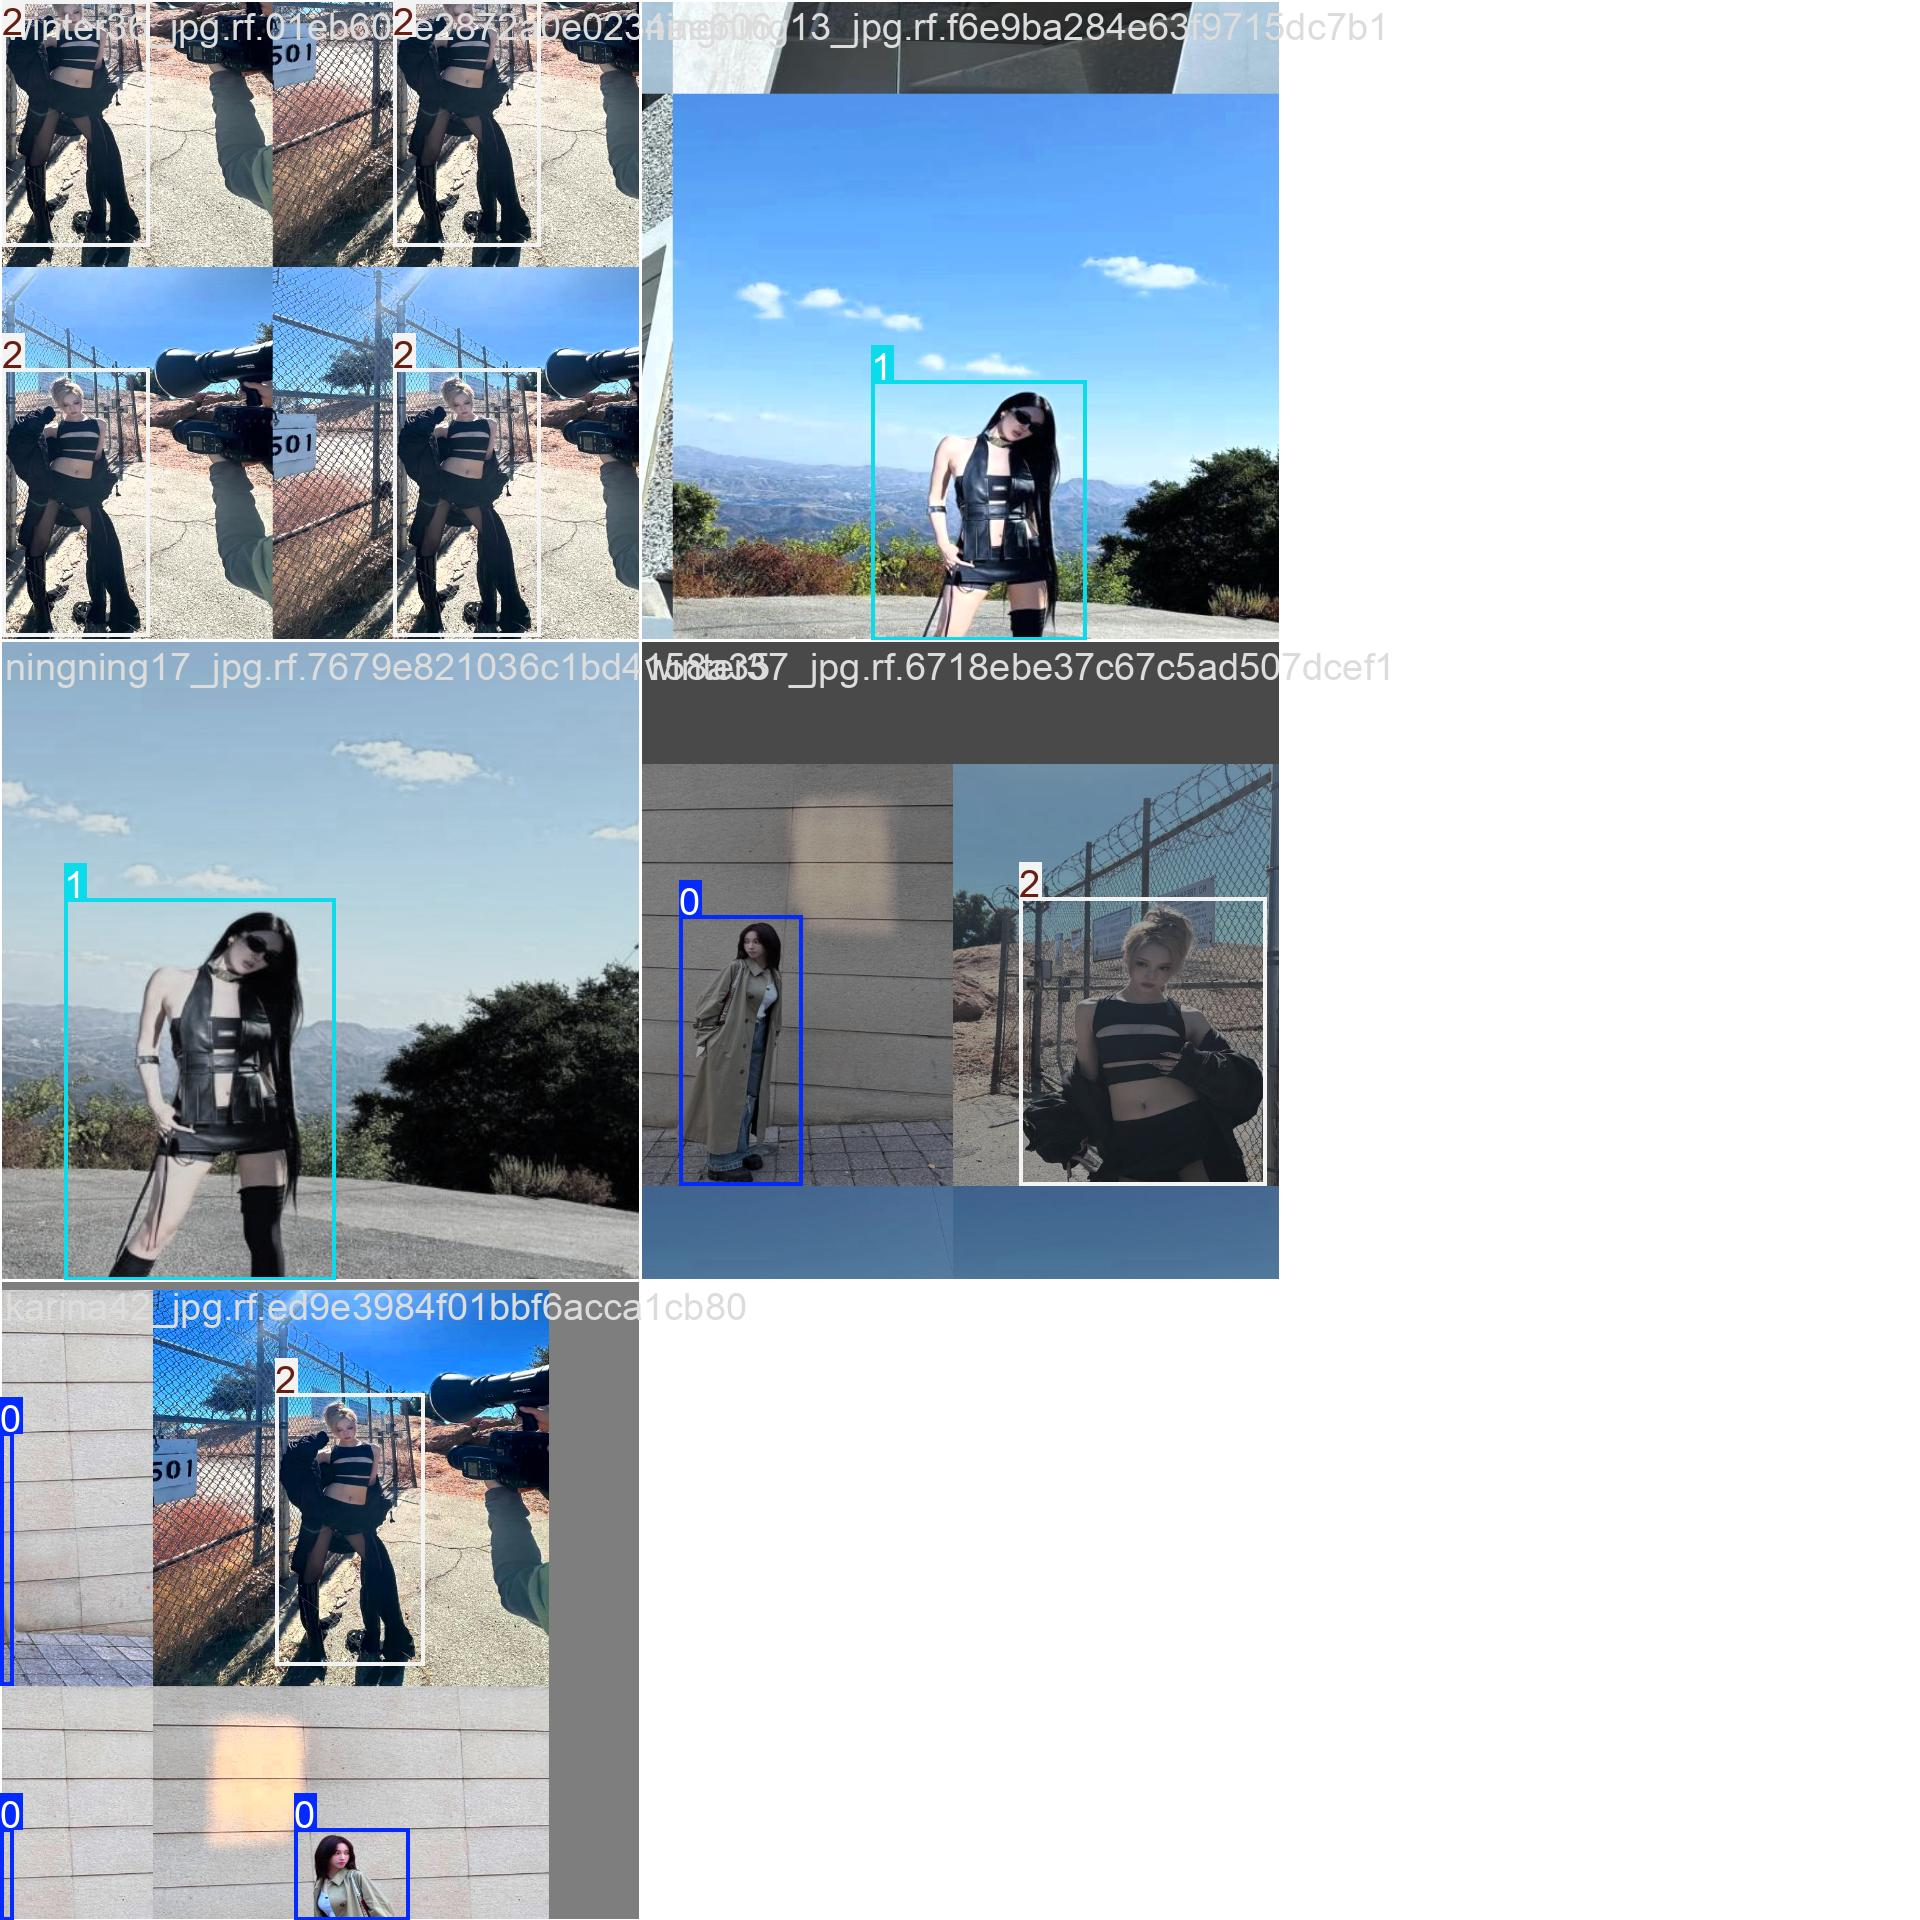

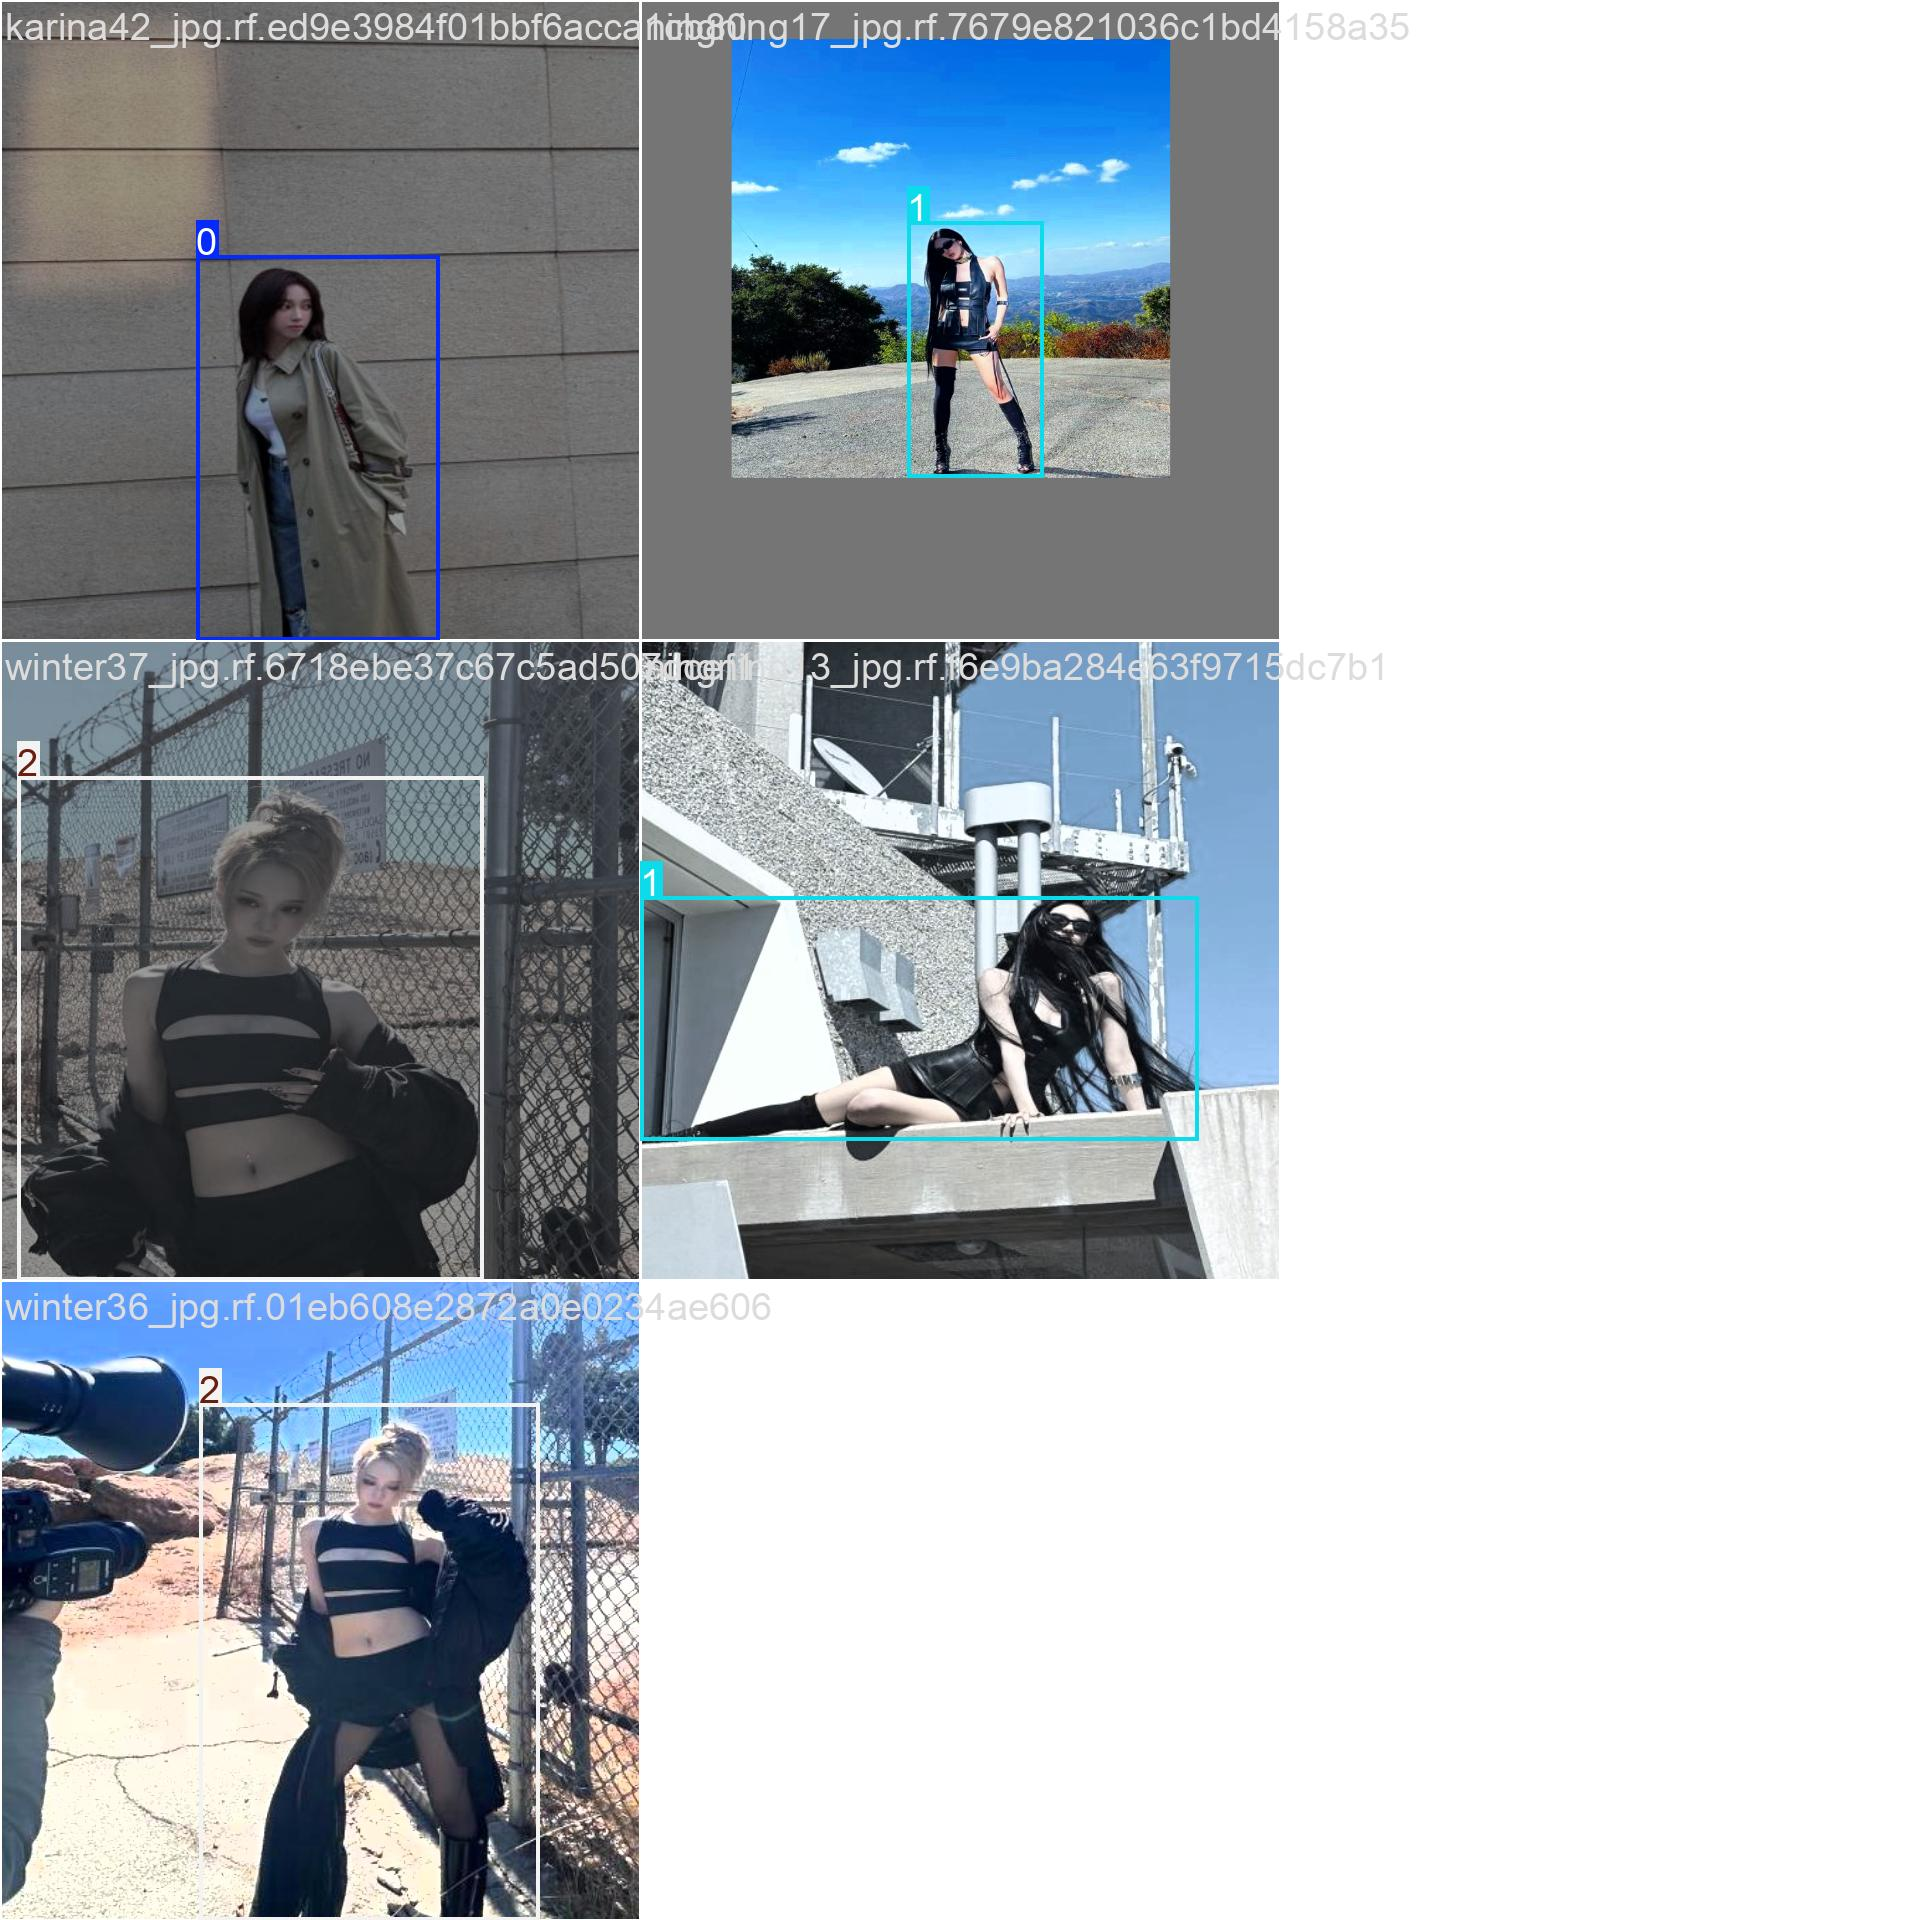

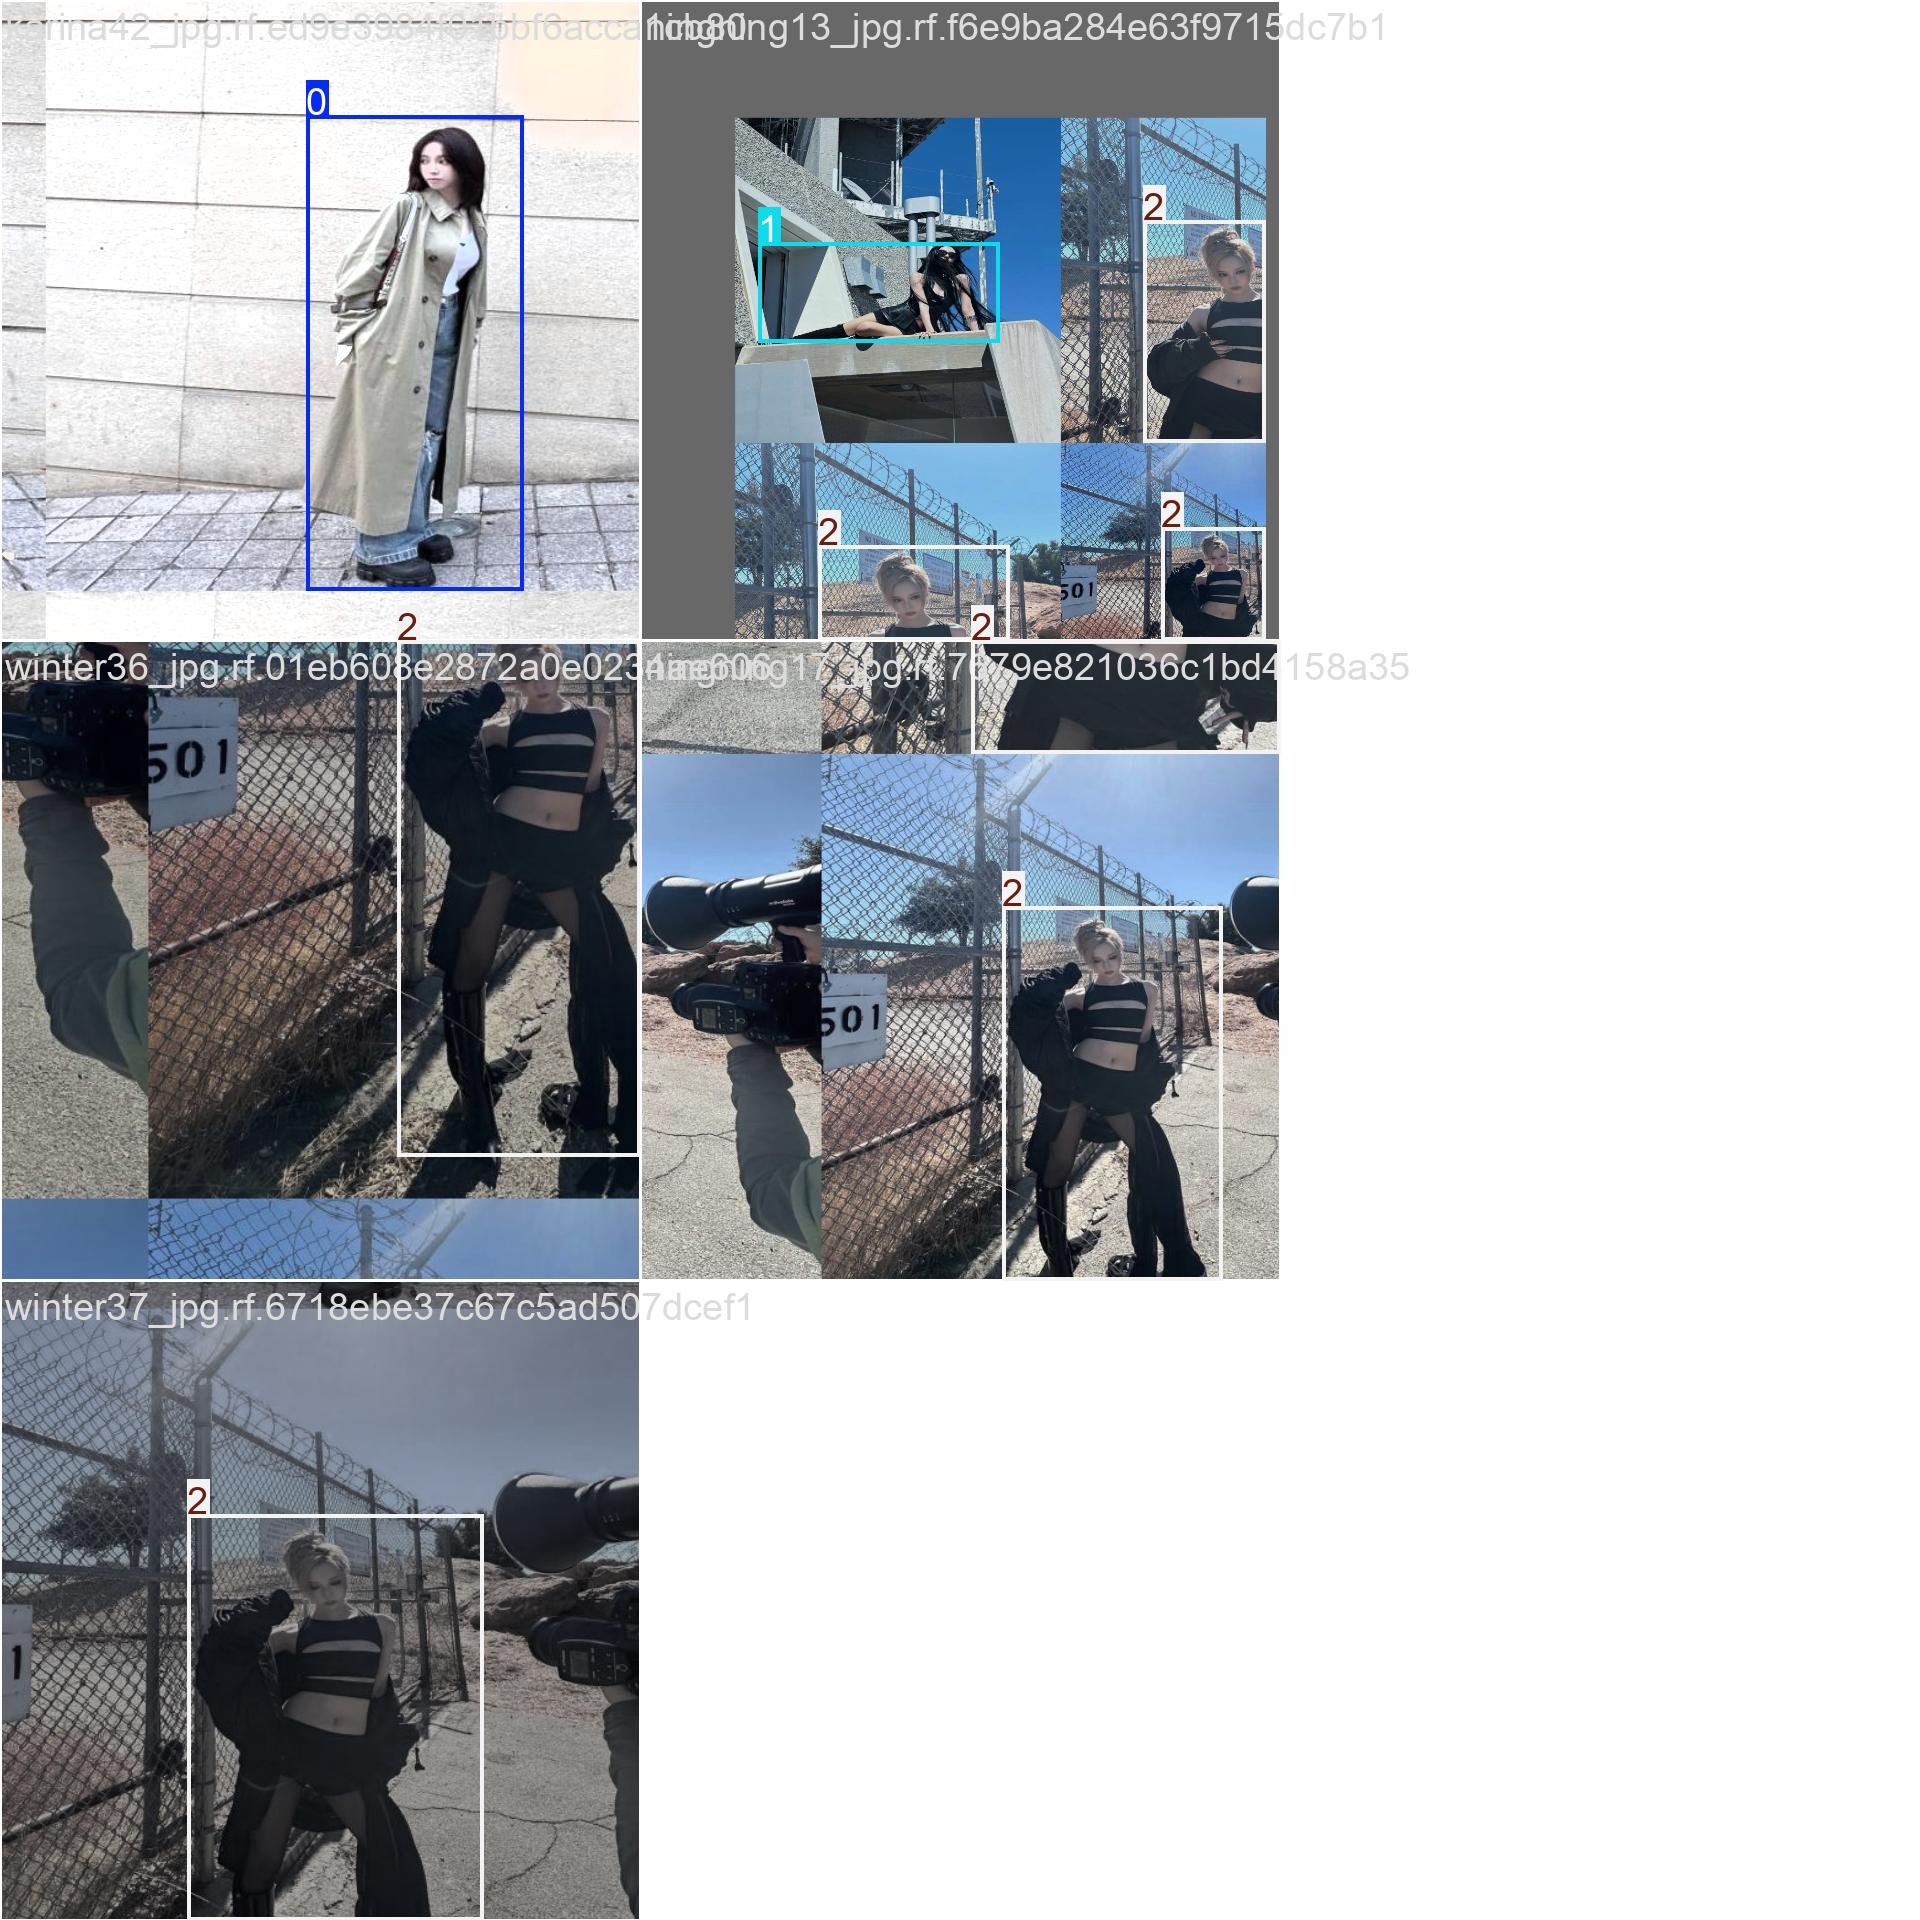

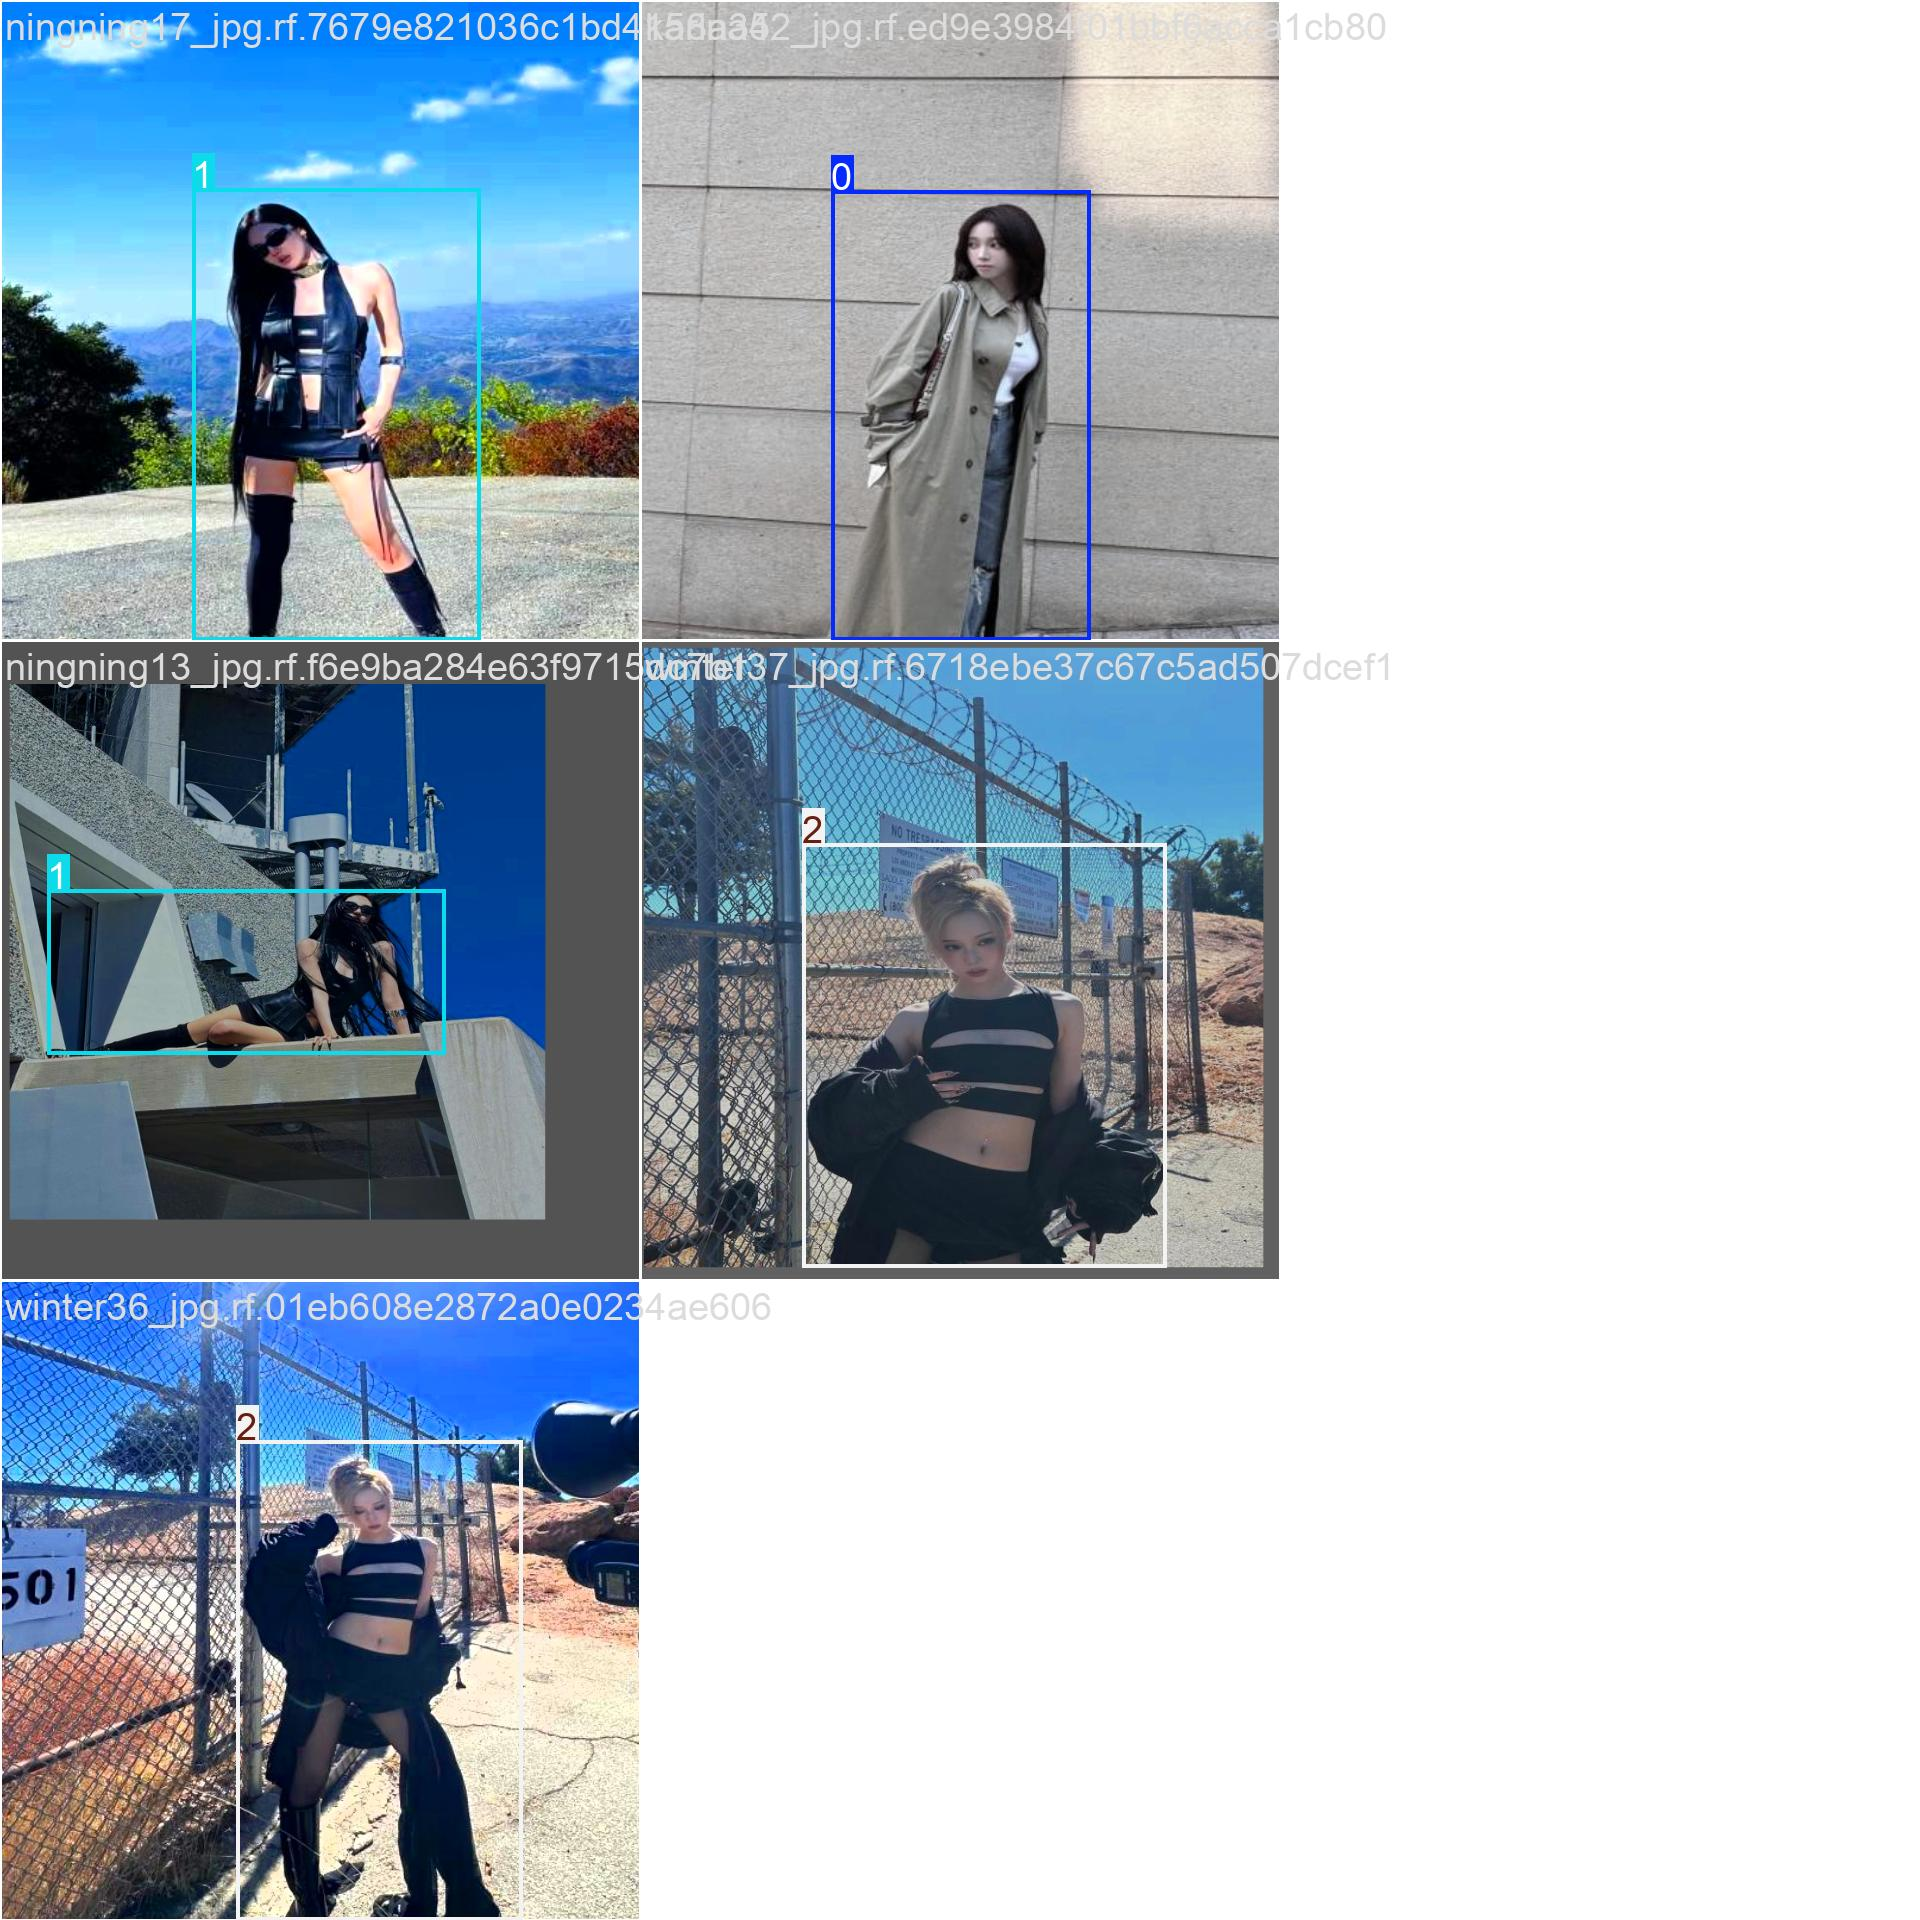

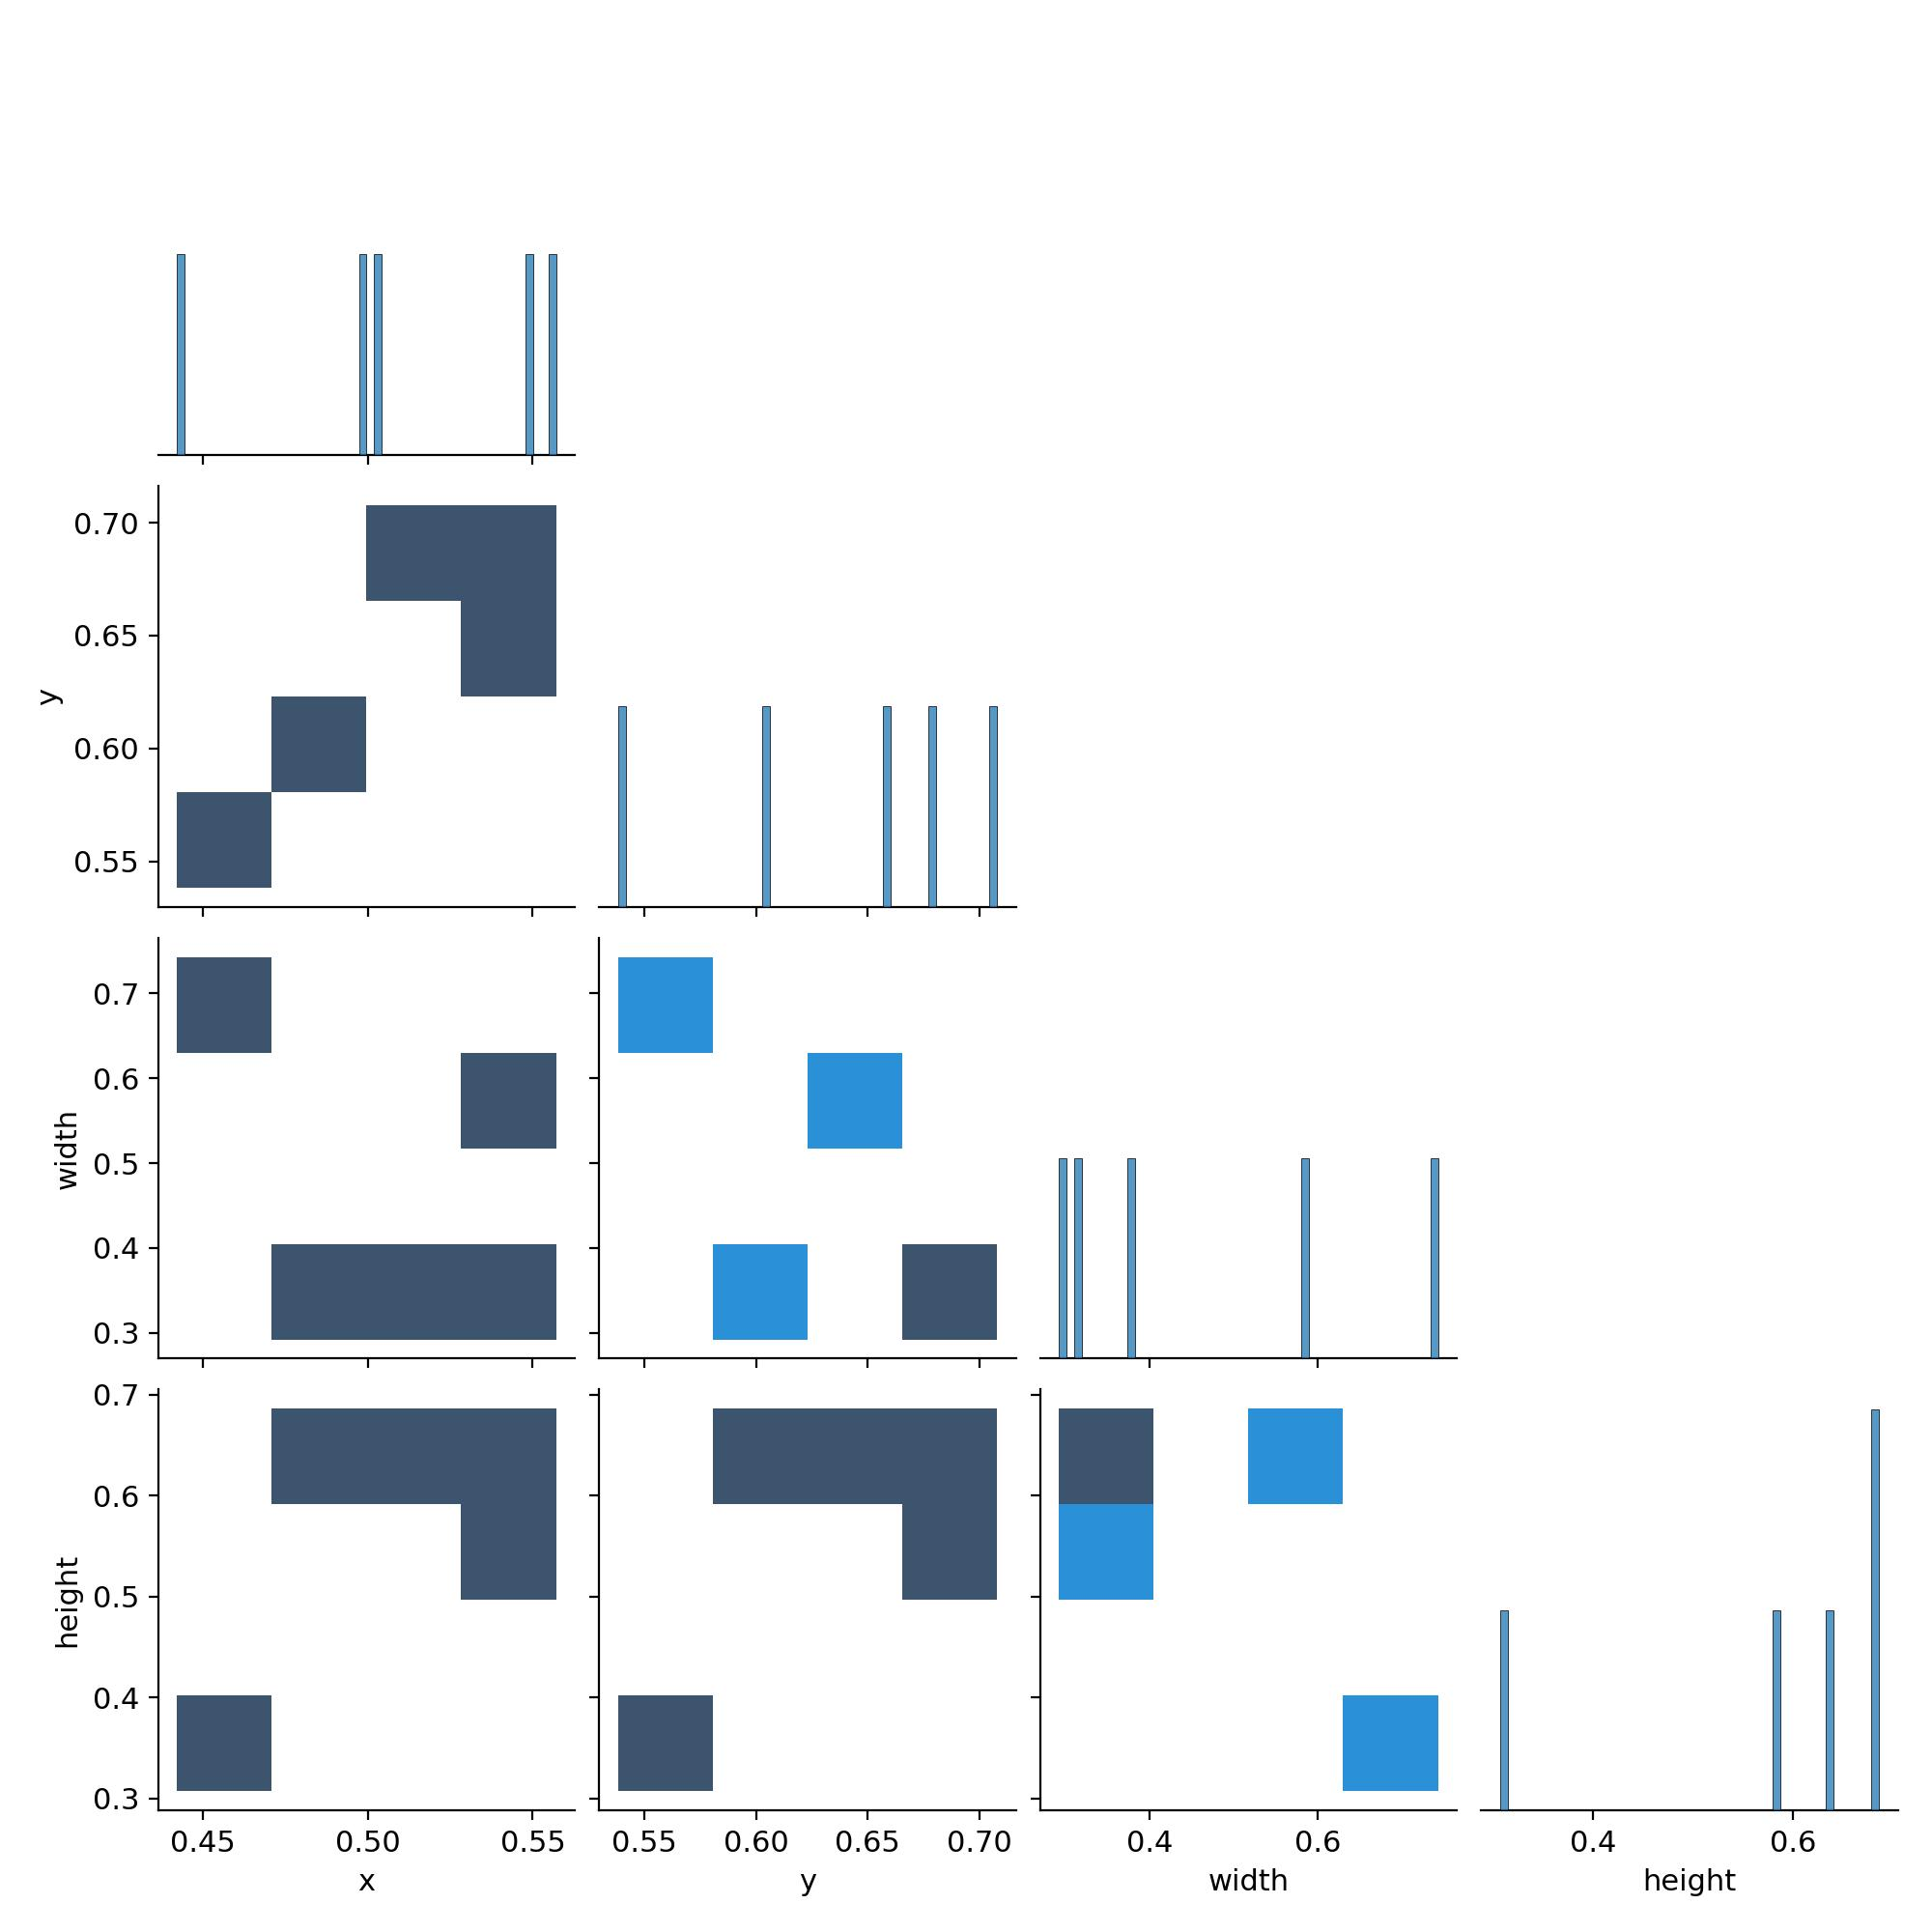

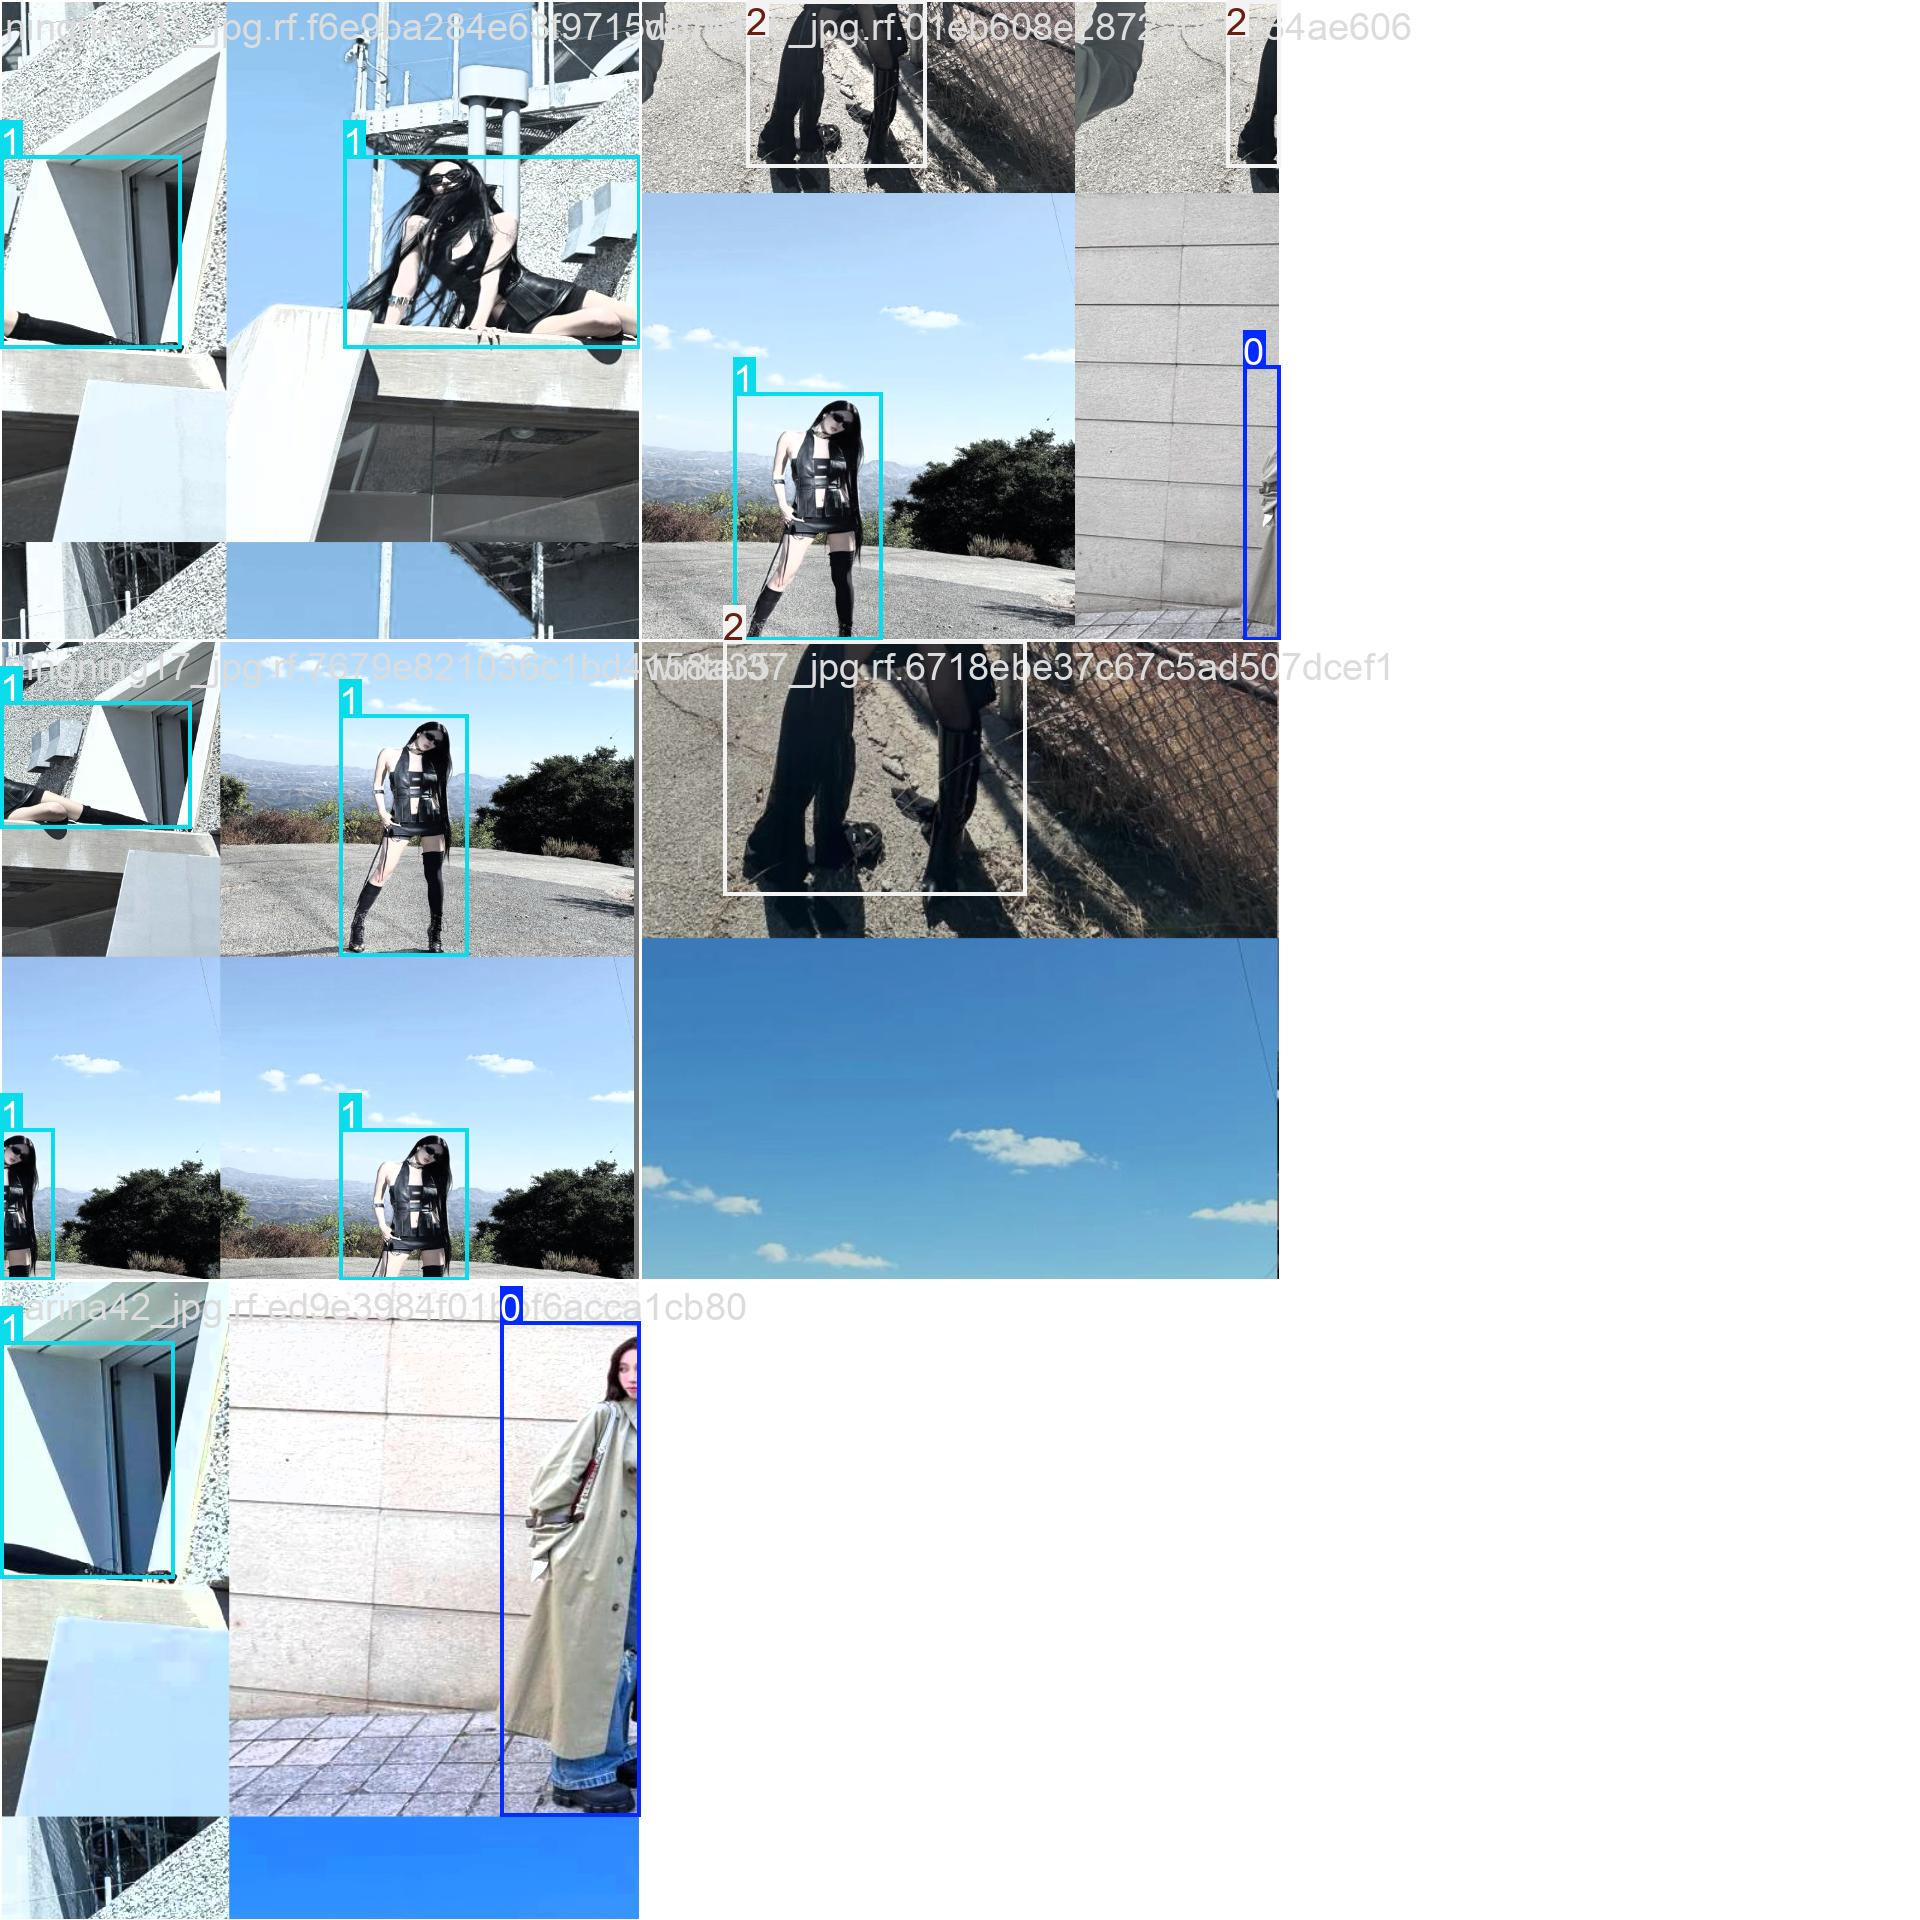

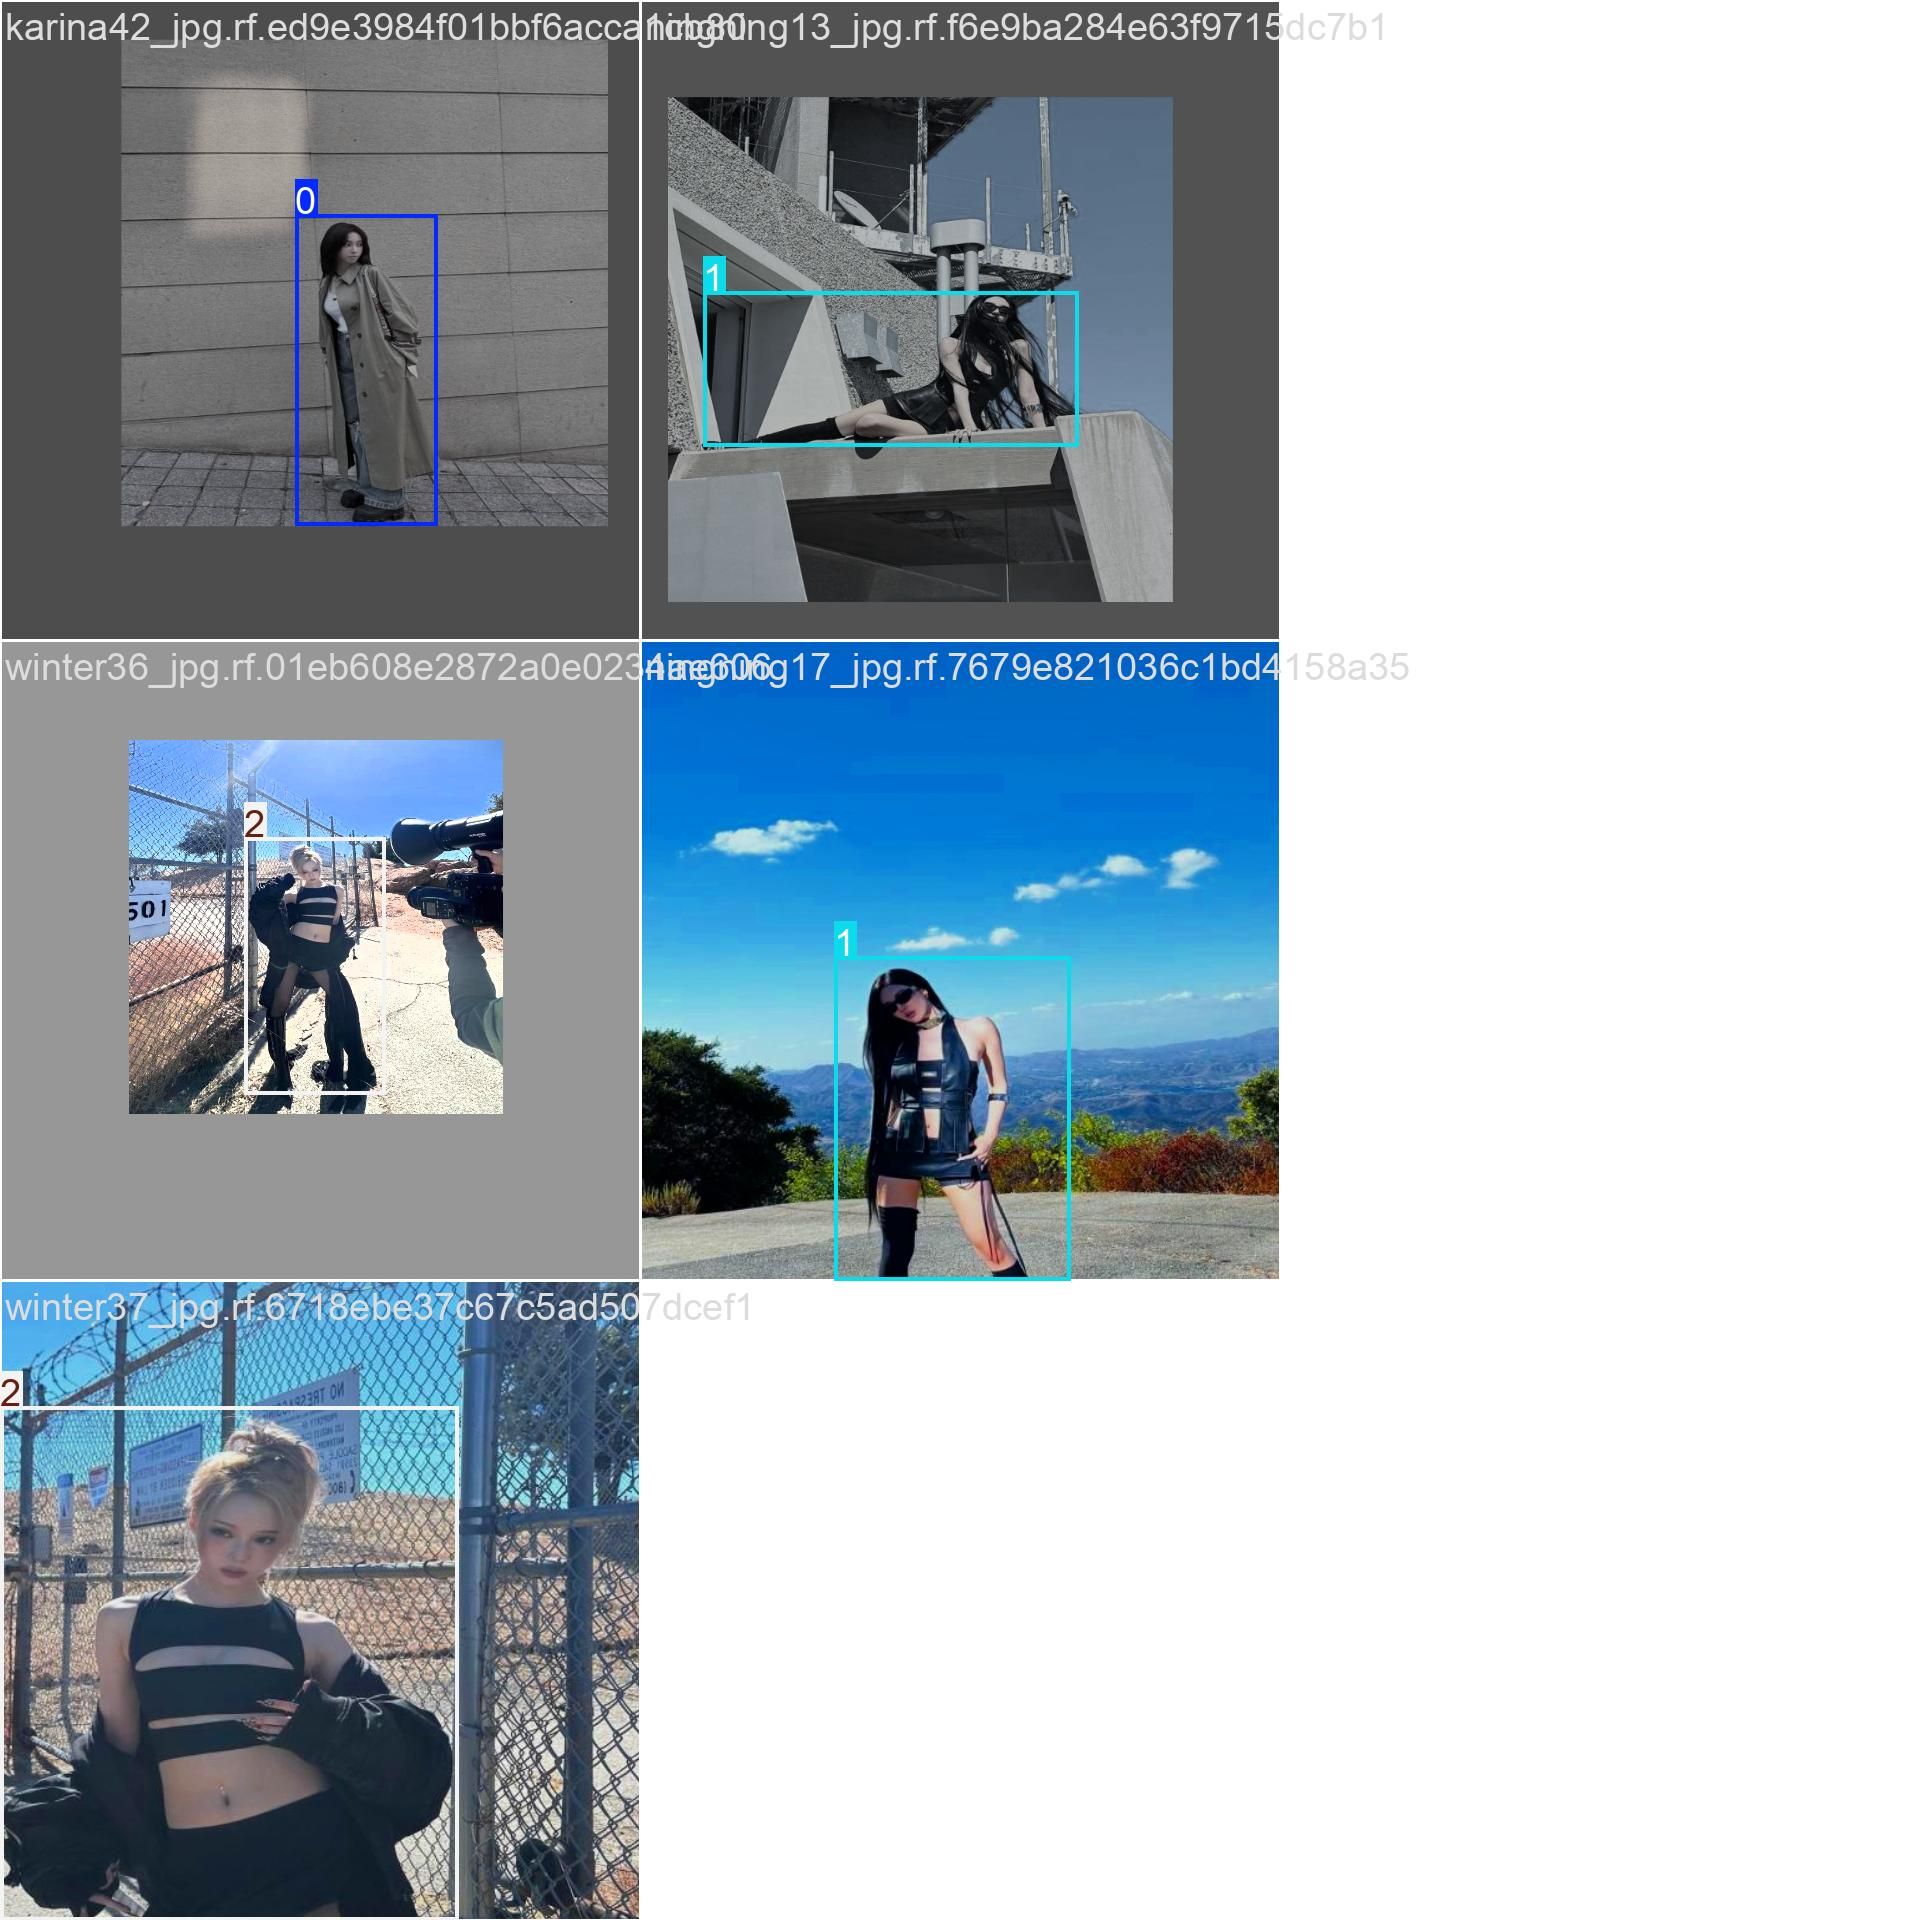

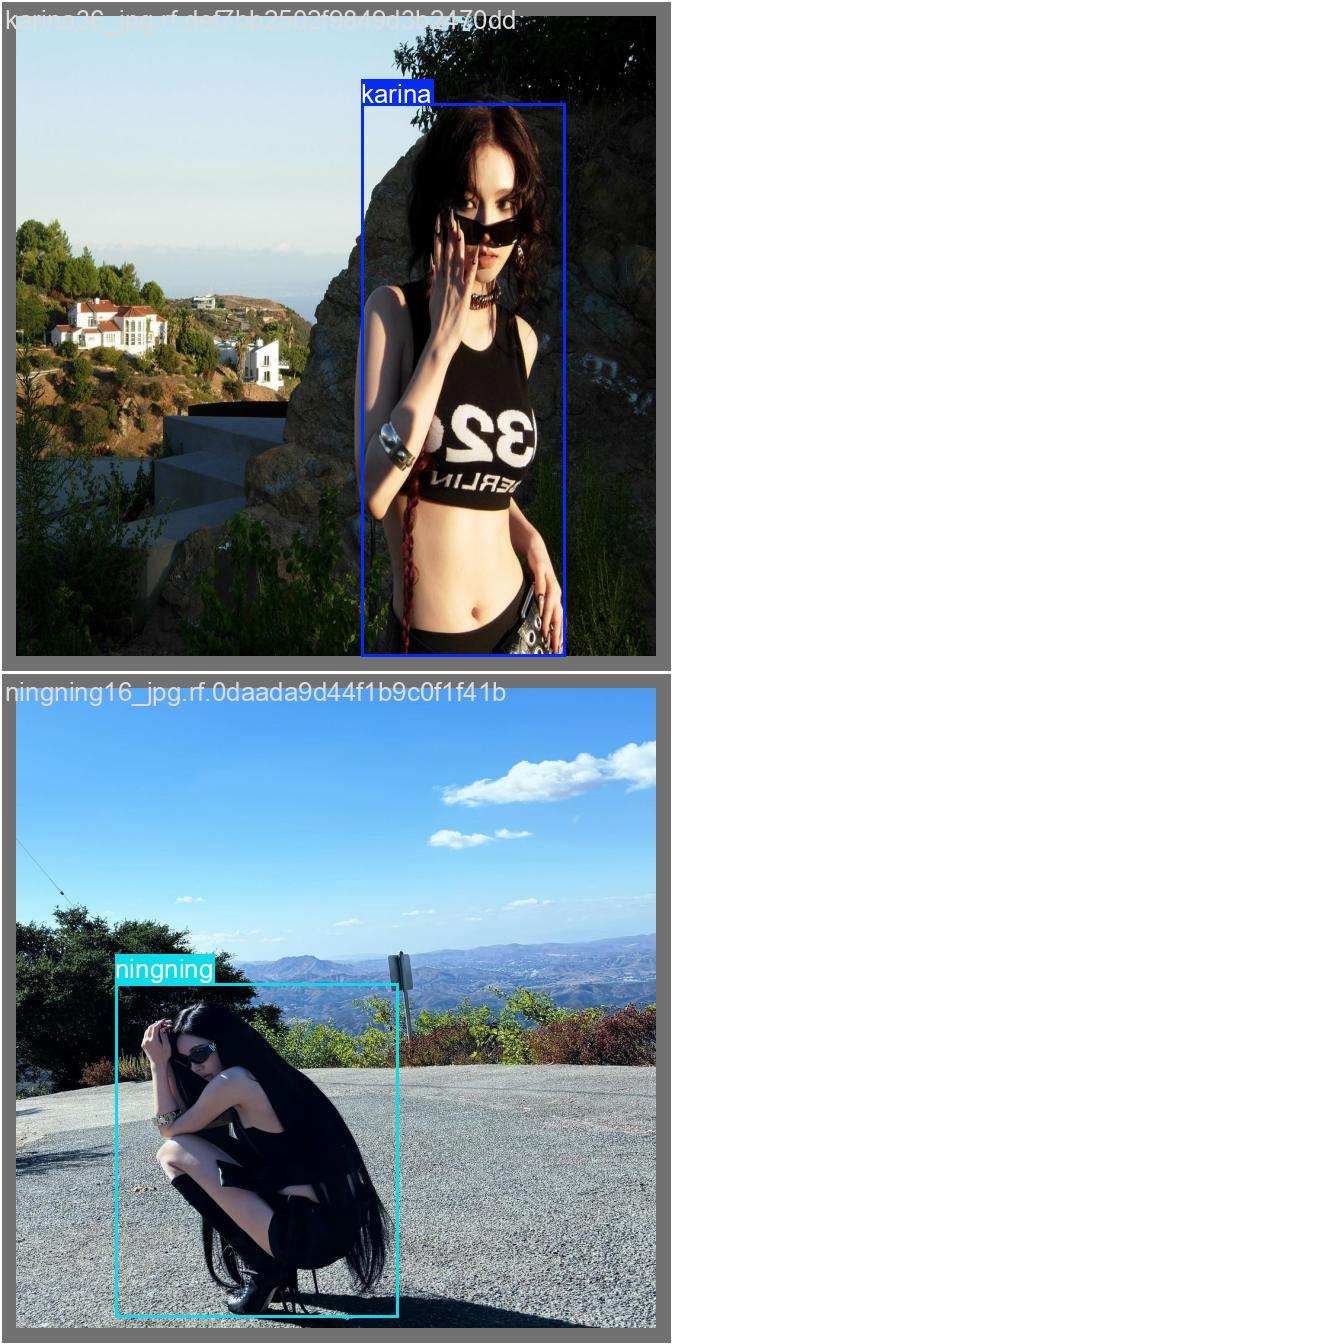

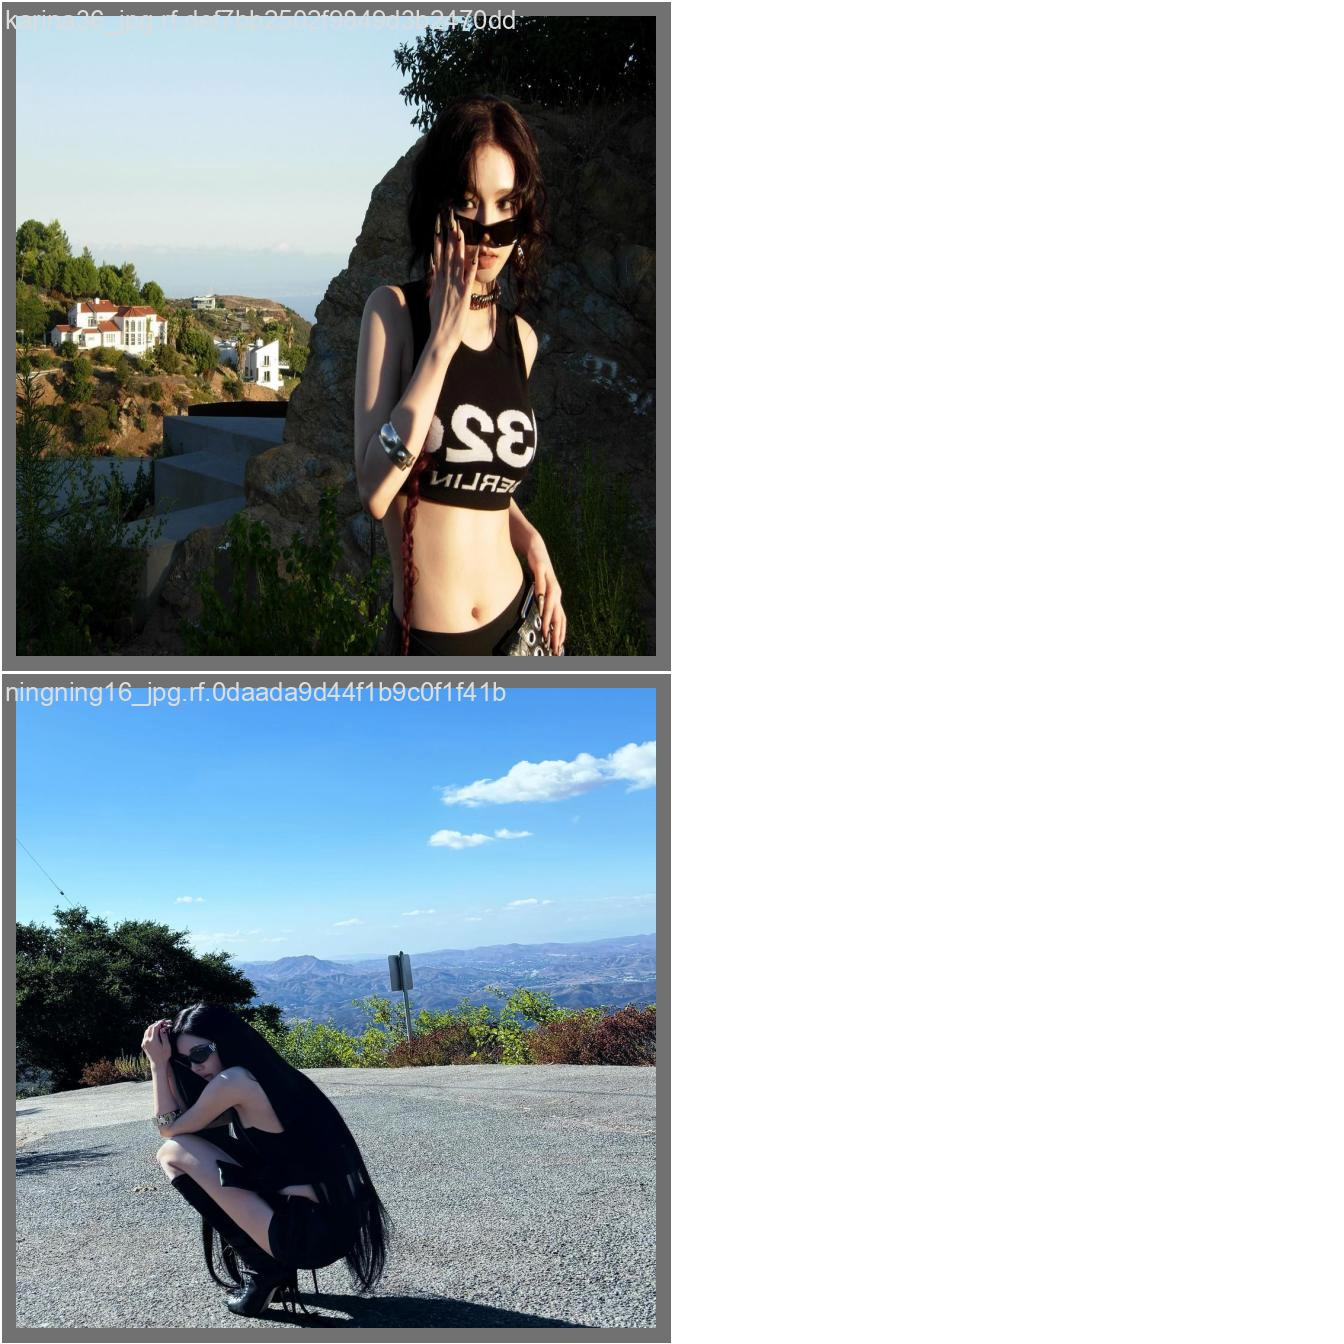

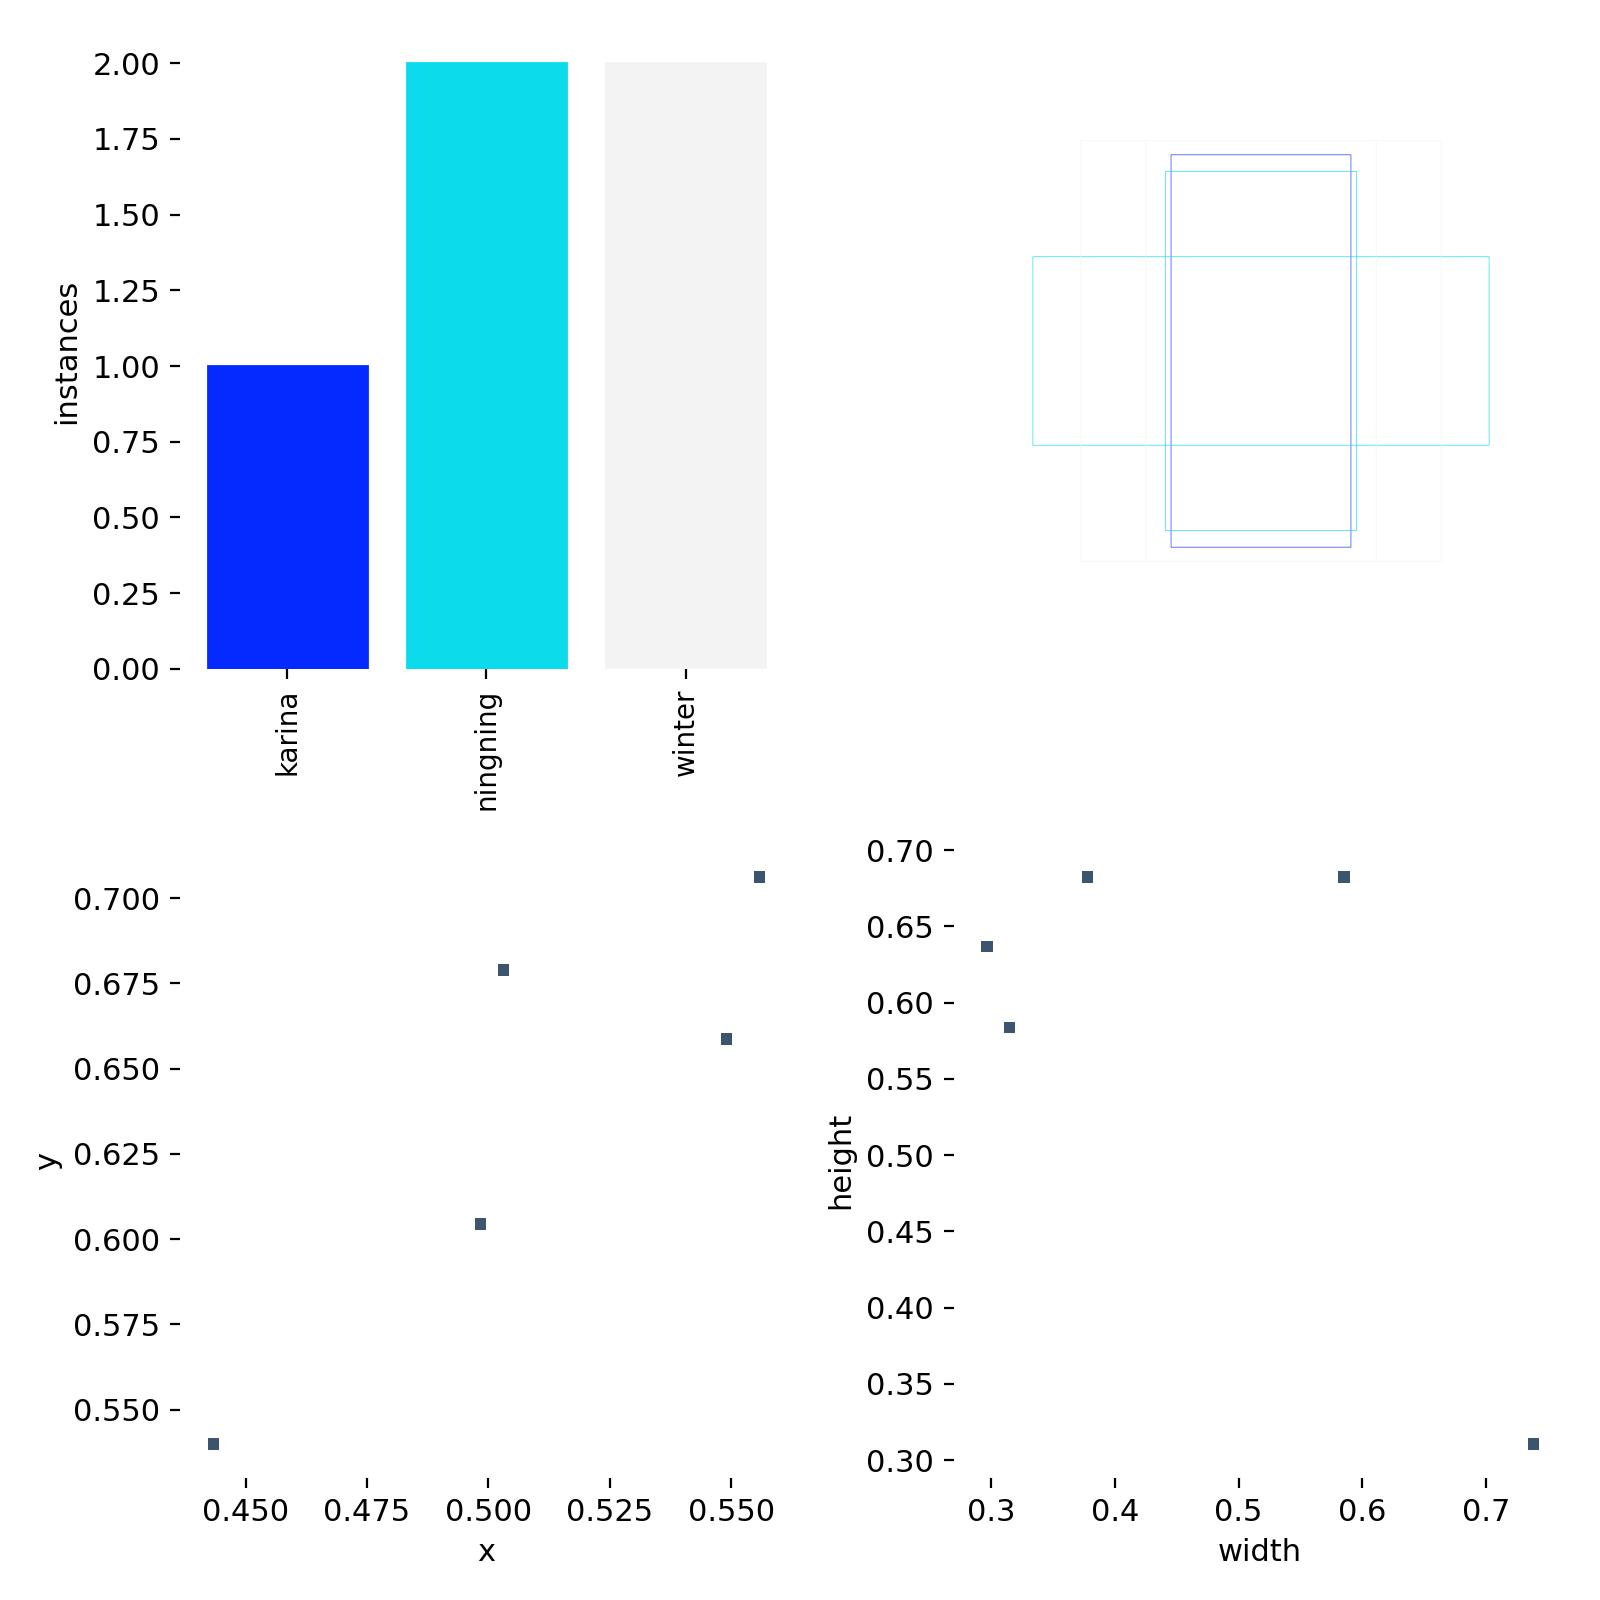

In [11]:
from IPython.display import Image, display
import glob

for image_path in glob.glob("../runs/detect/train17/*.jpg"):
    display(Image(filename=image_path, height=600))
    print("\n")